# **Importing Libraries**

In [1]:
from datetime import datetime
import datetime as dt
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX


import warnings
warnings.filterwarnings("ignore")

# **Loading Data from Drive and Examining**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

 5630E4FA-08A3-43B6-B4C4-443AA14380D4.jpeg
'Adsız doküman (1).gdoc'
'Adsız doküman.gdoc'
'Adsız sunu (1).gslides'
'Adsız sunu.gslides'
'Big data and Advanced Analytics Social Media.ipynb'
'BreastCancer_code (1).ipynb'
 BreastCancer_code.ipynb
 breast_data.csv
'C1 Gender roles.gdoc'
 Classroom
'Colab Notebooks'
 data_csv.csv
 data.xlsm
'Dublin Dil Okulları.gmap'
'Dublin diploma okulları.gmap'
'Faurecia data'
 features.csv
 gams
'IE487 Kitap'
'Kopyası - C1 Outcomes unit 7 Science fiction films .gdoc'
 mycity.csv
 stores.csv
 THESIS
 train.csv
"Turkish women's haircut changes .gdoc"


In [4]:
df_store = pd.read_csv("/content/drive/MyDrive/stores.csv")

In [5]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")

In [6]:
df_features = pd.read_csv("/content/drive/MyDrive/features.csv")

In [7]:
df_store.head()

store type    size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [8]:
df_train.head()

store  dept        date  weekly_sales  isholiday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [9]:
df_features.head()

store        date  temperature  fuel_price  markdown1  markdown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   markdown3  markdown4  markdown5         cpi  unemployment  isholiday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

# **Data Preperation**

## 1. Merging

In [10]:
# merging 3 different sets
df = df_train.merge(df_features, on=['store', 'date'], how='inner').merge(df_store, on=['store'], how='inner')
df.head(5)

store  dept        date  weekly_sales  isholiday_x  temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     2  2010-02-05      50605.27        False        42.31   
2      1     3  2010-02-05      13740.12        False        42.31   
3      1     4  2010-02-05      39954.04        False        42.31   
4      1     5  2010-02-05      32229.38        False        42.31   

   fuel_price  markdown1  markdown2  markdown3  markdown4  markdown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          cpi  unemployment  isholiday_y type    size  
0  211.096358         8.106        False    A  151315  
1  211.096358         8.106        False    A  151315  
2  211.096358         8.106        False    A  151315  
3  211.096358         8.106        False    A  151315  
4  211.096358         8.106        False    A  151315

In [11]:
df.drop(['isholiday_y'], axis=1,inplace=True) # removing dublicated column


### 2. Rename the Columns

In [12]:
df.rename(columns={'isholiday_x':'isholiday'},inplace=True) # rename the column


In [13]:
df.head() # last ready data set


store  dept        date  weekly_sales  isholiday  temperature  fuel_price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     2  2010-02-05      50605.27      False        42.31       2.572   
2      1     3  2010-02-05      13740.12      False        42.31       2.572   
3      1     4  2010-02-05      39954.04      False        42.31       2.572   
4      1     5  2010-02-05      32229.38      False        42.31       2.572   

   markdown1  markdown2  markdown3  markdown4  markdown5         cpi  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   unemployment type    size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [14]:
df.shape

(421570, 16)

In [15]:
# some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday     421570 non-null  bool   
 5   temperature   421570 non-null  float64
 6   fuel_price    421570 non-null  float64
 7   markdown1     150681 non-null  float64
 8   markdown2     111248 non-null  float64
 9   markdown3     137091 non-null  float64
 10  markdown4     134967 non-null  float64
 11  markdown5     151432 non-null  float64
 12  cpi           421570 non-null  float64
 13  unemployment  421570 non-null  float64
 14  type          421570 non-null  object 
 15  size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [16]:
# change float format in data
pd.options.display.float_format = '{:,.0f}'.format


In [17]:
# Now, the "Date" column is converted to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

store  dept       date  weekly_sales  isholiday  temperature  fuel_price  \
0      1     1 2010-02-05        24,924      False           42           3   
1      1     2 2010-02-05        50,605      False           42           3   
2      1     3 2010-02-05        13,740      False           42           3   
3      1     4 2010-02-05        39,954      False           42           3   
4      1     5 2010-02-05        32,229      False           42           3   

   markdown1  markdown2  markdown3  markdown4  markdown5  cpi  unemployment  \
0        NaN        NaN        NaN        NaN        NaN  211             8   
1        NaN        NaN        NaN        NaN        NaN  211             8   
2        NaN        NaN        NaN        NaN        NaN  211             8   
3        NaN        NaN        NaN        NaN        NaN  211             8   
4        NaN        NaN        NaN        NaN        NaN  211             8   

  type    size  
0    A  151315  
1    A  151315  
2    A  151315  
3    A  151315  
4    A  151315

In [18]:
df.dtypes

store                    int64
dept                     int64
date            datetime64[ns]
weekly_sales           float64
isholiday                 bool
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
type                    object
size                     int64
dtype: object

In [19]:
# data distribution
df.describe()

store    dept  weekly_sales  temperature  fuel_price  markdown1  \
count 421,570 421,570       421,570      421,570     421,570    150,681   
mean       22      44        15,981           60           3      7,246   
std        13      30        22,711           18           0      8,291   
min         1       1        -4,989           -2           2          0   
25%        11      18         2,080           47           3      2,240   
50%        22      37         7,612           62           3      5,347   
75%        33      74        20,206           74           4      9,211   
max        45      99       693,099          100           4     88,647   

       markdown2  markdown3  markdown4  markdown5     cpi  unemployment  \
count    111,248    137,091    134,967    151,432 421,570       421,570   
mean       3,335      1,439      3,383      4,629     171             8   
std        9,475      9,623      6,292      5,963      39             2   
min         -266        -29          0        135     126             4   
25%           42          5        504      1,878     132             7   
50%          192         25      1,481      3,359     182             8   
75%        1,927        104      3,595      5,564     212             9   
max      104,520    141,631     67,475    108,519     227            14   

         size  
count 421,570  
mean  136,728  
std    60,981  
min    34,875  
25%    93,638  
50%   140,167  
75%   202,505  
max   219,622

### 3. Checking the Missing Values

In [20]:
# check missing values
df.isnull().sum()

store                0
dept                 0
date                 0
weekly_sales         0
isholiday            0
temperature          0
fuel_price           0
markdown1       270889
markdown2       310322
markdown3       284479
markdown4       286603
markdown5       270138
cpi                  0
unemployment         0
type                 0
size                 0
dtype: int64

There are lots of missing values in the markdown columns. If there is not a relevant value will be find when analyzing the markdown effect on sales, the columns of markdowns will be dropped. Otherwise, the data has no missing value.

***Markdown***

Markdown columns are unauthorised and more than 60% of variables are missing as NaN. For analyzing, NaN values are filled with 0 so it can be think about there has no markdown in the timeline.

In [21]:
df = df.fillna(0) # filling null's with 0

In [22]:
df.isna().sum() # last null check

store           0
dept            0
date            0
weekly_sales    0
isholiday       0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
type            0
size            0
dtype: int64

In [23]:
df.describe()

store    dept  weekly_sales  temperature  fuel_price  markdown1  \
count 421,570 421,570       421,570      421,570     421,570    421,570   
mean       22      44        15,981           60           3      2,590   
std        13      30        22,711           18           0      6,052   
min         1       1        -4,989           -2           2          0   
25%        11      18         2,080           47           3          0   
50%        22      37         7,612           62           3          0   
75%        33      74        20,206           74           4      2,809   
max        45      99       693,099          100           4     88,647   

       markdown2  markdown3  markdown4  markdown5     cpi  unemployment  \
count    421,570    421,570    421,570    421,570 421,570       421,570   
mean         880        468      1,083      1,663     171             8   
std        5,085      5,529      3,895      4,208      39             2   
min         -266        -29          0          0     126             4   
25%            0          0          0          0     132             7   
50%            0          0          0          0     182             8   
75%            2          5        425      2,168     212             9   
max      104,520    141,631     67,475    108,519     227            14   

         size  
count 421,570  
mean  136,728  
std    60,981  
min    34,875  
25%    93,638  
50%   140,167  
75%   202,505  
max   219,622

### 4. Checking the Duplication

In [24]:
# Check Duplicate Values
df.duplicated().sum()

0

The data has no duplicate value.

In [25]:
def get_season(quarter):

    '''this function is to get season according to quarter column'''

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [26]:
# Create a new column "year" containing the year
df['year'] = df['date'].dt.year

# Create a new column "quarter" containing the season number
df['quarter'] = df['date'].dt.quarter

# Create a new column "season" containing the season
df['season'] = df['quarter'].apply(get_season)

# Create a new column "month" containing the month number
df['month'] = df['date'].dt.month

# Create a new column "month_name" containing the month names
df['month_name'] = df['date'].dt.month_name()

# Create a new column "week" containing the week number
df['week'] = df['date'].dt.isocalendar().week
df['week'] = df['week'].astype('int32')

# Create a new column "day_of_week" containing the day names
df['day_of_week'] = df['date'].dt.strftime('%A')

df.head()

store  dept       date  weekly_sales  isholiday  temperature  fuel_price  \
0      1     1 2010-02-05        24,924      False           42           3   
1      1     2 2010-02-05        50,605      False           42           3   
2      1     3 2010-02-05        13,740      False           42           3   
3      1     4 2010-02-05        39,954      False           42           3   
4      1     5 2010-02-05        32,229      False           42           3   

   markdown1  markdown2  markdown3  ...  unemployment  type    size  year  \
0          0          0          0  ...             8     A  151315  2010   
1          0          0          0  ...             8     A  151315  2010   
2          0          0          0  ...             8     A  151315  2010   
3          0          0          0  ...             8     A  151315  2010   
4          0          0          0  ...             8     A  151315  2010   

  quarter  season  month  month_name week  day_of_week  
0       1  Winter      2    February    5       Friday  
1       1  Winter      2    February    5       Friday  
2       1  Winter      2    February    5       Friday  
3       1  Winter      2    February    5       Friday  
4       1  Winter      2    February    5       Friday  

[5 rows x 23 columns]

Description of the Columns:​

**store**: the store number

**dept**: the department number

**date**: the week of sales

**weekly_sales**: the weekly sales for the given store

**isholiday**: whether the week is a special holiday week or not (True = holiday week; False = non-holiday week - It will turn 1 for True and 0 for False when analyzing)

**temperature**: average temperature in the region for the given week.

**fuel_price**: cost of fuel in the region for the given week.

**markdown 1,2,3,4,5**: anonymized data related to promotional markdowns that Walmart is running.

**CPI**: the consumer price index for the given week.

**unemployment**: the unemployment rate for the region for the given week

**type**: 3 store types which are A, B and C

**size**: stores size

date; the week of sales; was splitted 7 columns which are: **year**, **quarter**, **season**, **month**, **month_name**, **week**, **day_of_week** for better analyze

# **Exploratory Data Analysis (EDA)**


In [27]:
df.describe().T

count    mean    std    min    25%     50%     75%     max
store        421,570      22     13      1     11      22      33      45
dept         421,570      44     30      1     18      37      74      99
weekly_sales 421,570  15,981 22,711 -4,989  2,080   7,612  20,206 693,099
temperature  421,570      60     18     -2     47      62      74     100
fuel_price   421,570       3      0      2      3       3       4       4
markdown1    421,570   2,590  6,052      0      0       0   2,809  88,647
markdown2    421,570     880  5,085   -266      0       0       2 104,520
markdown3    421,570     468  5,529    -29      0       0       5 141,631
markdown4    421,570   1,083  3,895      0      0       0     425  67,475
markdown5    421,570   1,663  4,208      0      0       0   2,168 108,519
cpi          421,570     171     39    126    132     182     212     227
unemployment 421,570       8      2      4      7       8       9      14
size         421,570 136,728 60,981 34,875 93,638 140,167 202,505 219,622
year         421,570   2,011      1  2,010  2,010   2,011   2,012   2,012
quarter      421,570       2      1      1      2       2       3       4
month        421,570       6      3      1      4       6       9      12
week         421,570      26     14      1     14      26      38      52

## Checking for Outliers

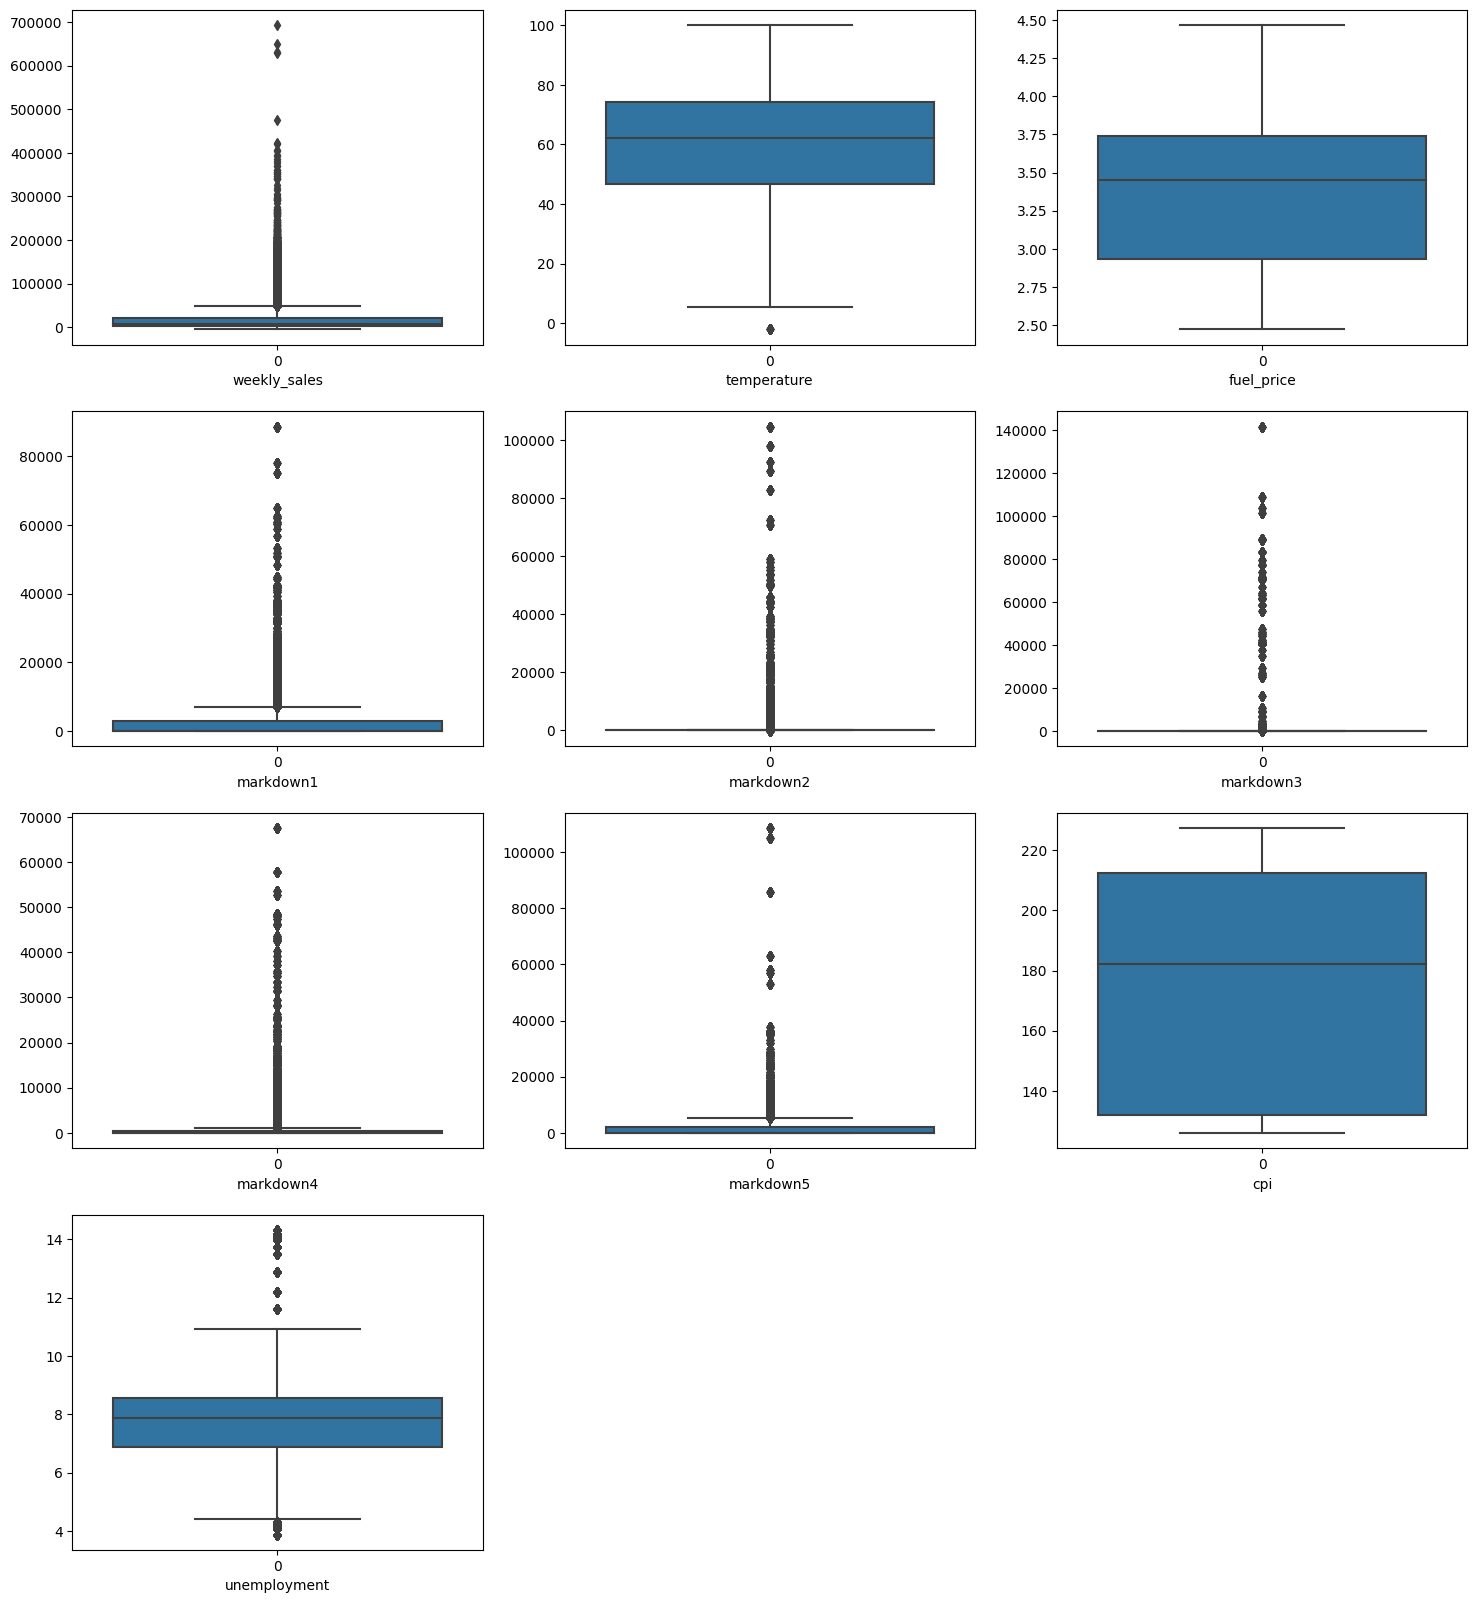

In [28]:
pno = 1
plt.figure(figsize = (18,20))
for i in ["weekly_sales", "temperature", "fuel_price", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5", "cpi", "unemployment"]:
  if pno<=10:
    plt.subplot(4,3,pno);
    pno+=1
    sns.boxplot(df[i]);
    plt.xlabel(i)

In [29]:
#Treading the outliners using z score
def treat_outliners():
  l = ["weekly_sales", "temperature", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5", "unemployment"]
  for i in l:
    z = np.abs(stats.zscore(df[i]))
    df[i] = np.where(z > 8, np.nan, df[i])
    df[i] = df[i].fillna(df[i].median())

treat_outliners()

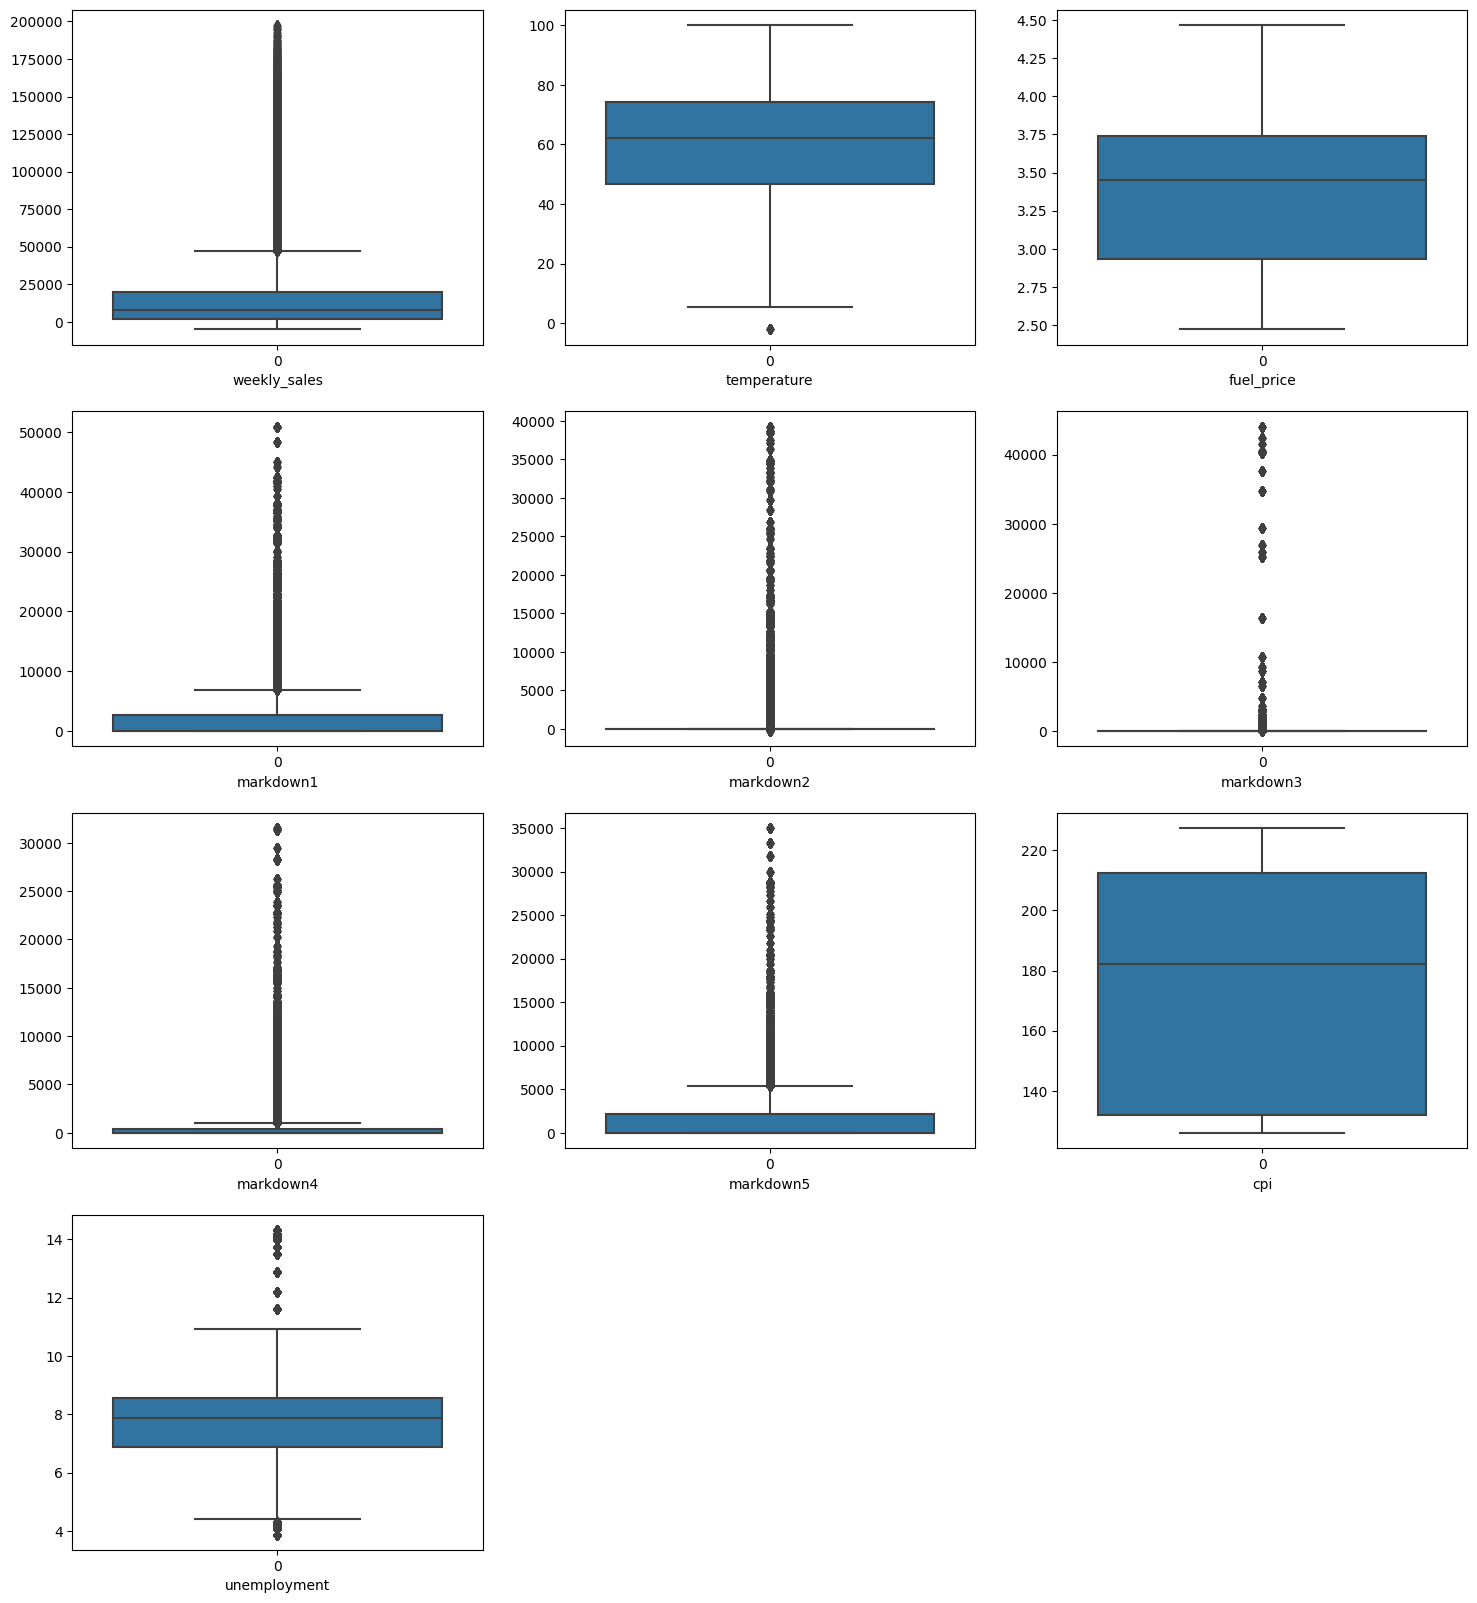

In [30]:
pno = 1
plt.figure(figsize = (18,20))
for i in["weekly_sales", "temperature","fuel_price", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5", "cpi", "unemployment"]:
  if pno<=10:
    plt.subplot(4,3,pno);
    pno+=1
    sns.boxplot(df[i]);
    plt.xlabel(i)

In [31]:
def treat_outliners():
  l = ["weekly_sales", "temperature", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5", "unemployment"]
  for i in l:
    x = np.quantile(df[i], [0,0.25,0.50,0.75])
    iqr = x[3]-x[1]
    upper_whisker = x[3]+1.5*iqr
    lower_whisker = x[1]-1.5*iqr
    df[i] = np.where(df[i]>upper_whisker,upper_whisker,(np.where(df[i]<lower_whisker,lower_whisker,df[i])))
treat_outliners()

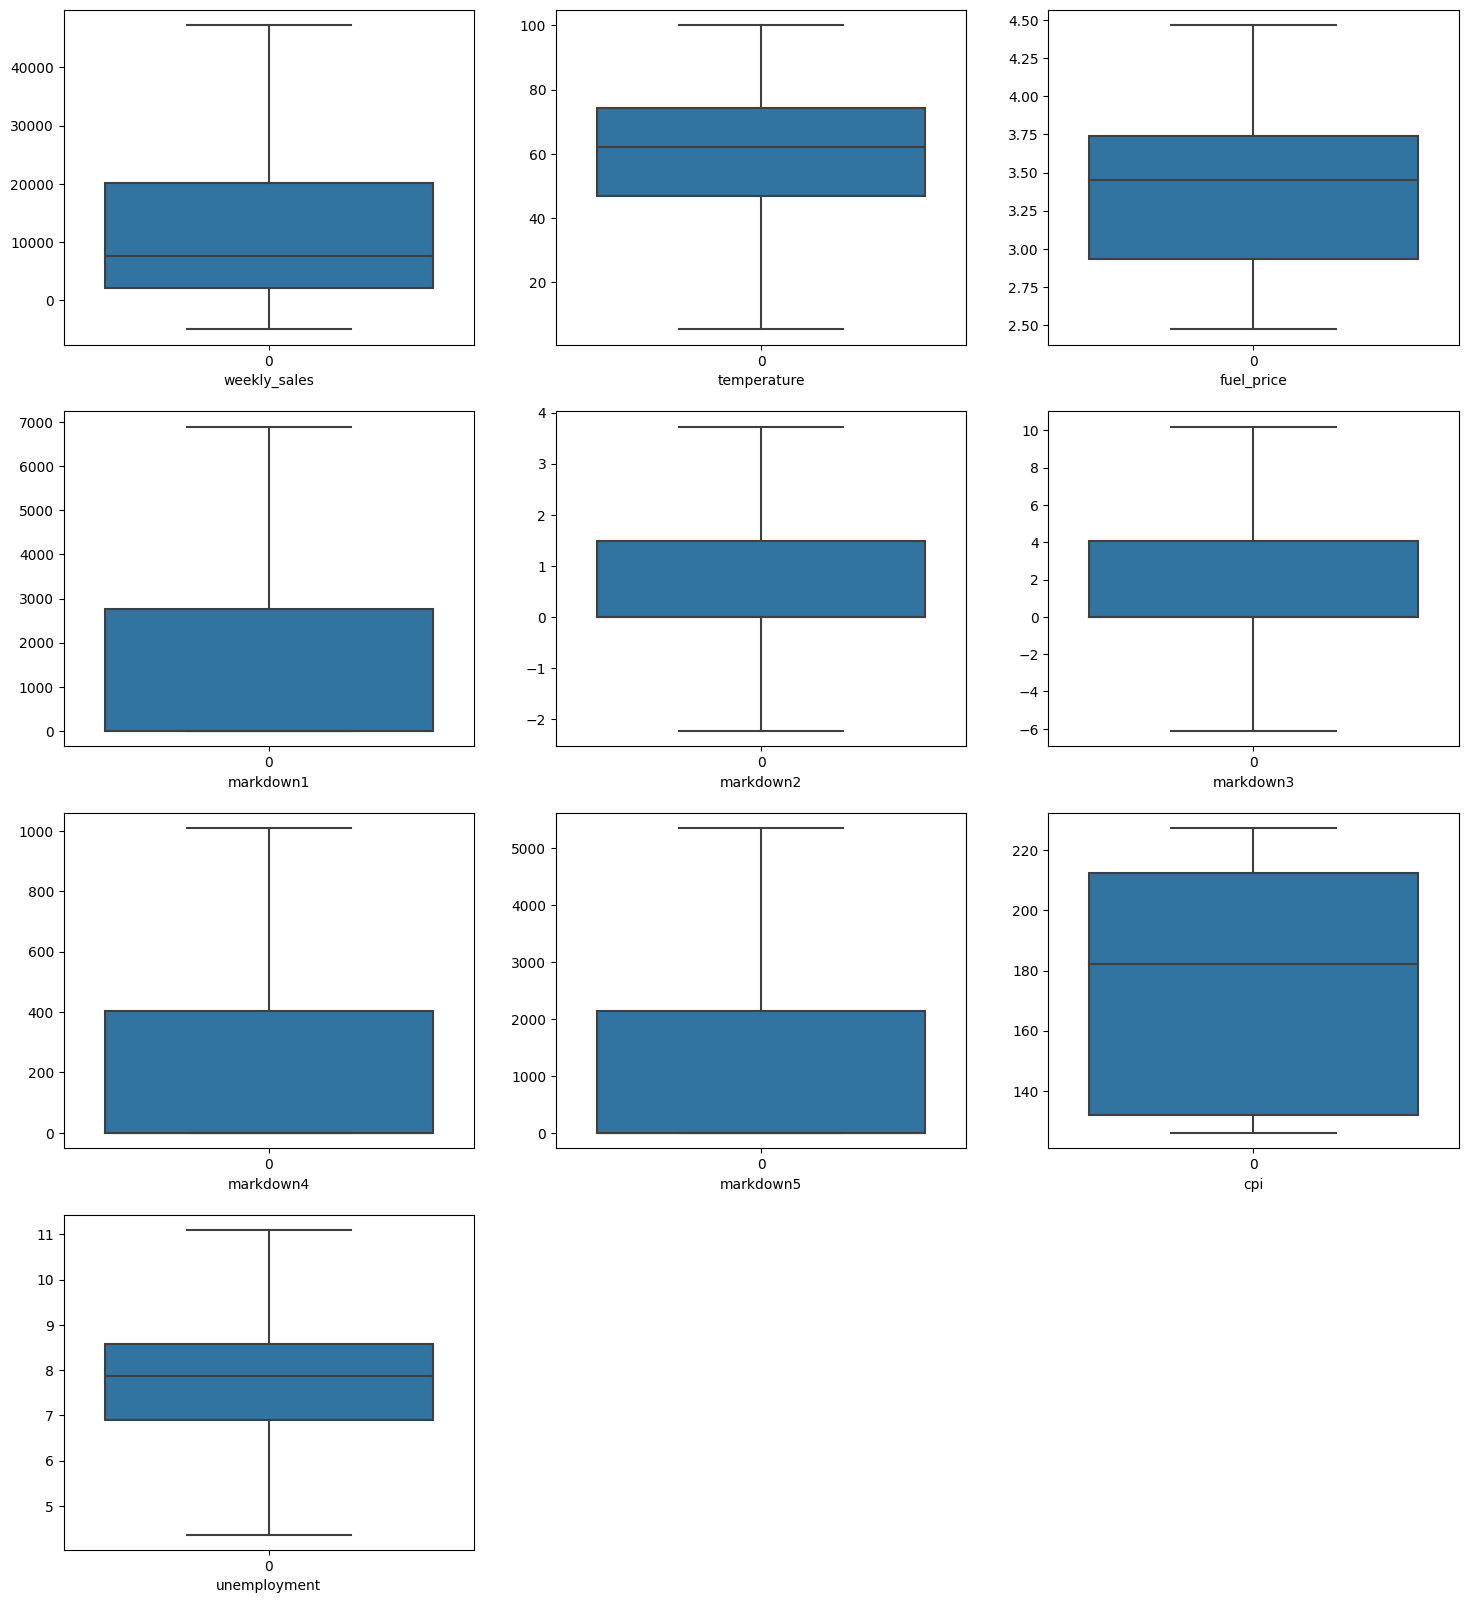

In [32]:
pno = 1
plt.figure(figsize = (18,20))
for i in["weekly_sales", "temperature","fuel_price", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5", "cpi", "unemployment"]:
  if pno<=10:
    plt.subplot(4,3,pno);
    pno+=1
    sns.boxplot(df[i]);
    plt.xlabel(i)

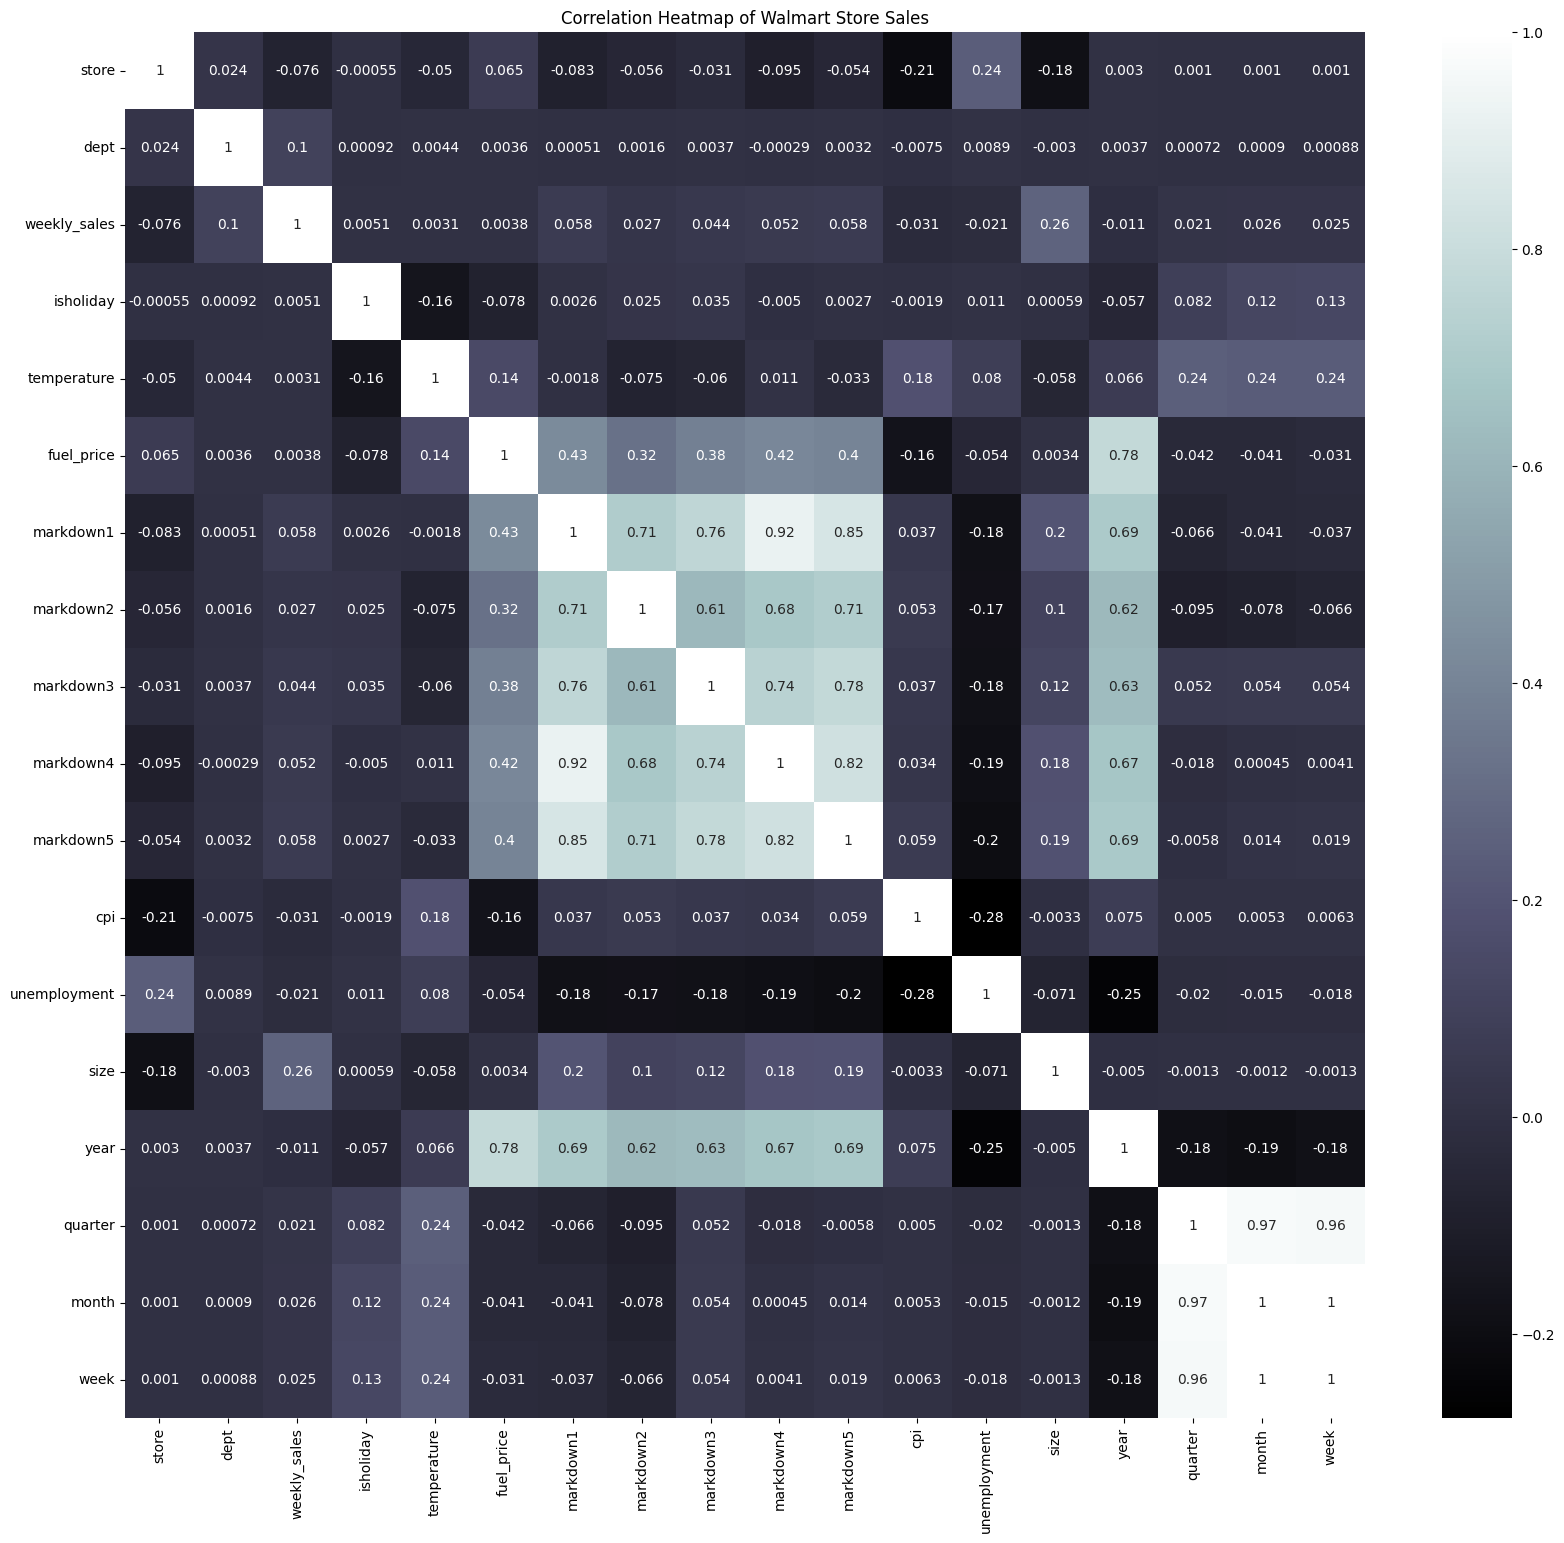

In [33]:
walmart_corr_matrix =df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(walmart_corr_matrix, annot=True, cmap='bone')
plt.title("Correlation Heatmap of Walmart Store Sales")
plt.show()


### 1. Univariate Analysis

#### 1.1   Numerical Features

* weekly_sales
* temperature
* fuel_price
* markdown 1,2,3,4,5
* unemployment
* cpi


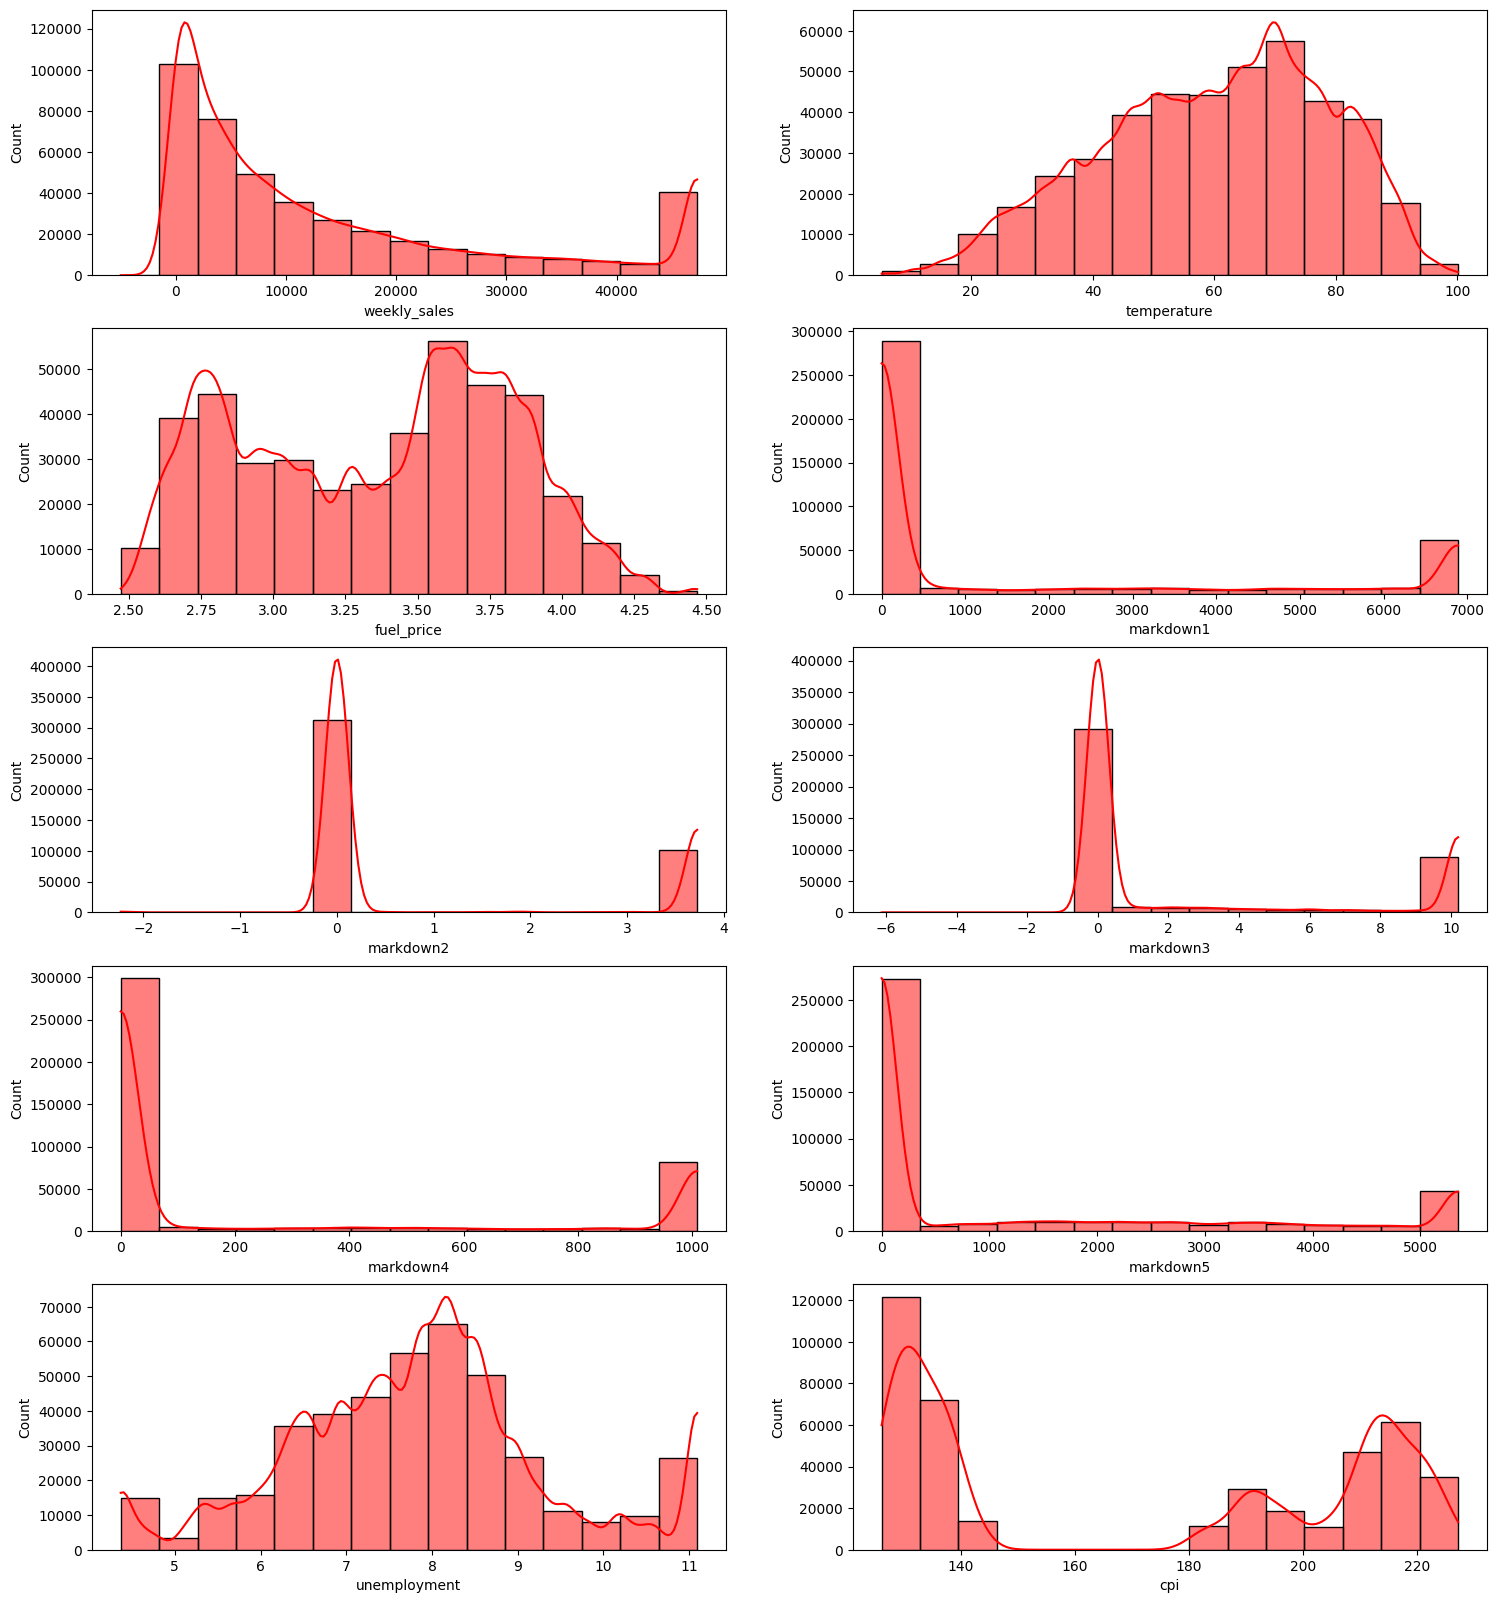

In [34]:
columns = ['weekly_sales', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'unemployment', 'cpi']
plt.figure(figsize=(18, 20))
for i,col in enumerate(columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color = 'r')
plt.show()


the distribution of weekly_sales is right skewed, this is normal because the weekly sales may be high in some time.

markdown 1 to 5 keen to pareto distribution.

temperature and unemployment have normal distribution.

fuel_price and cpi have bimodal distribution.

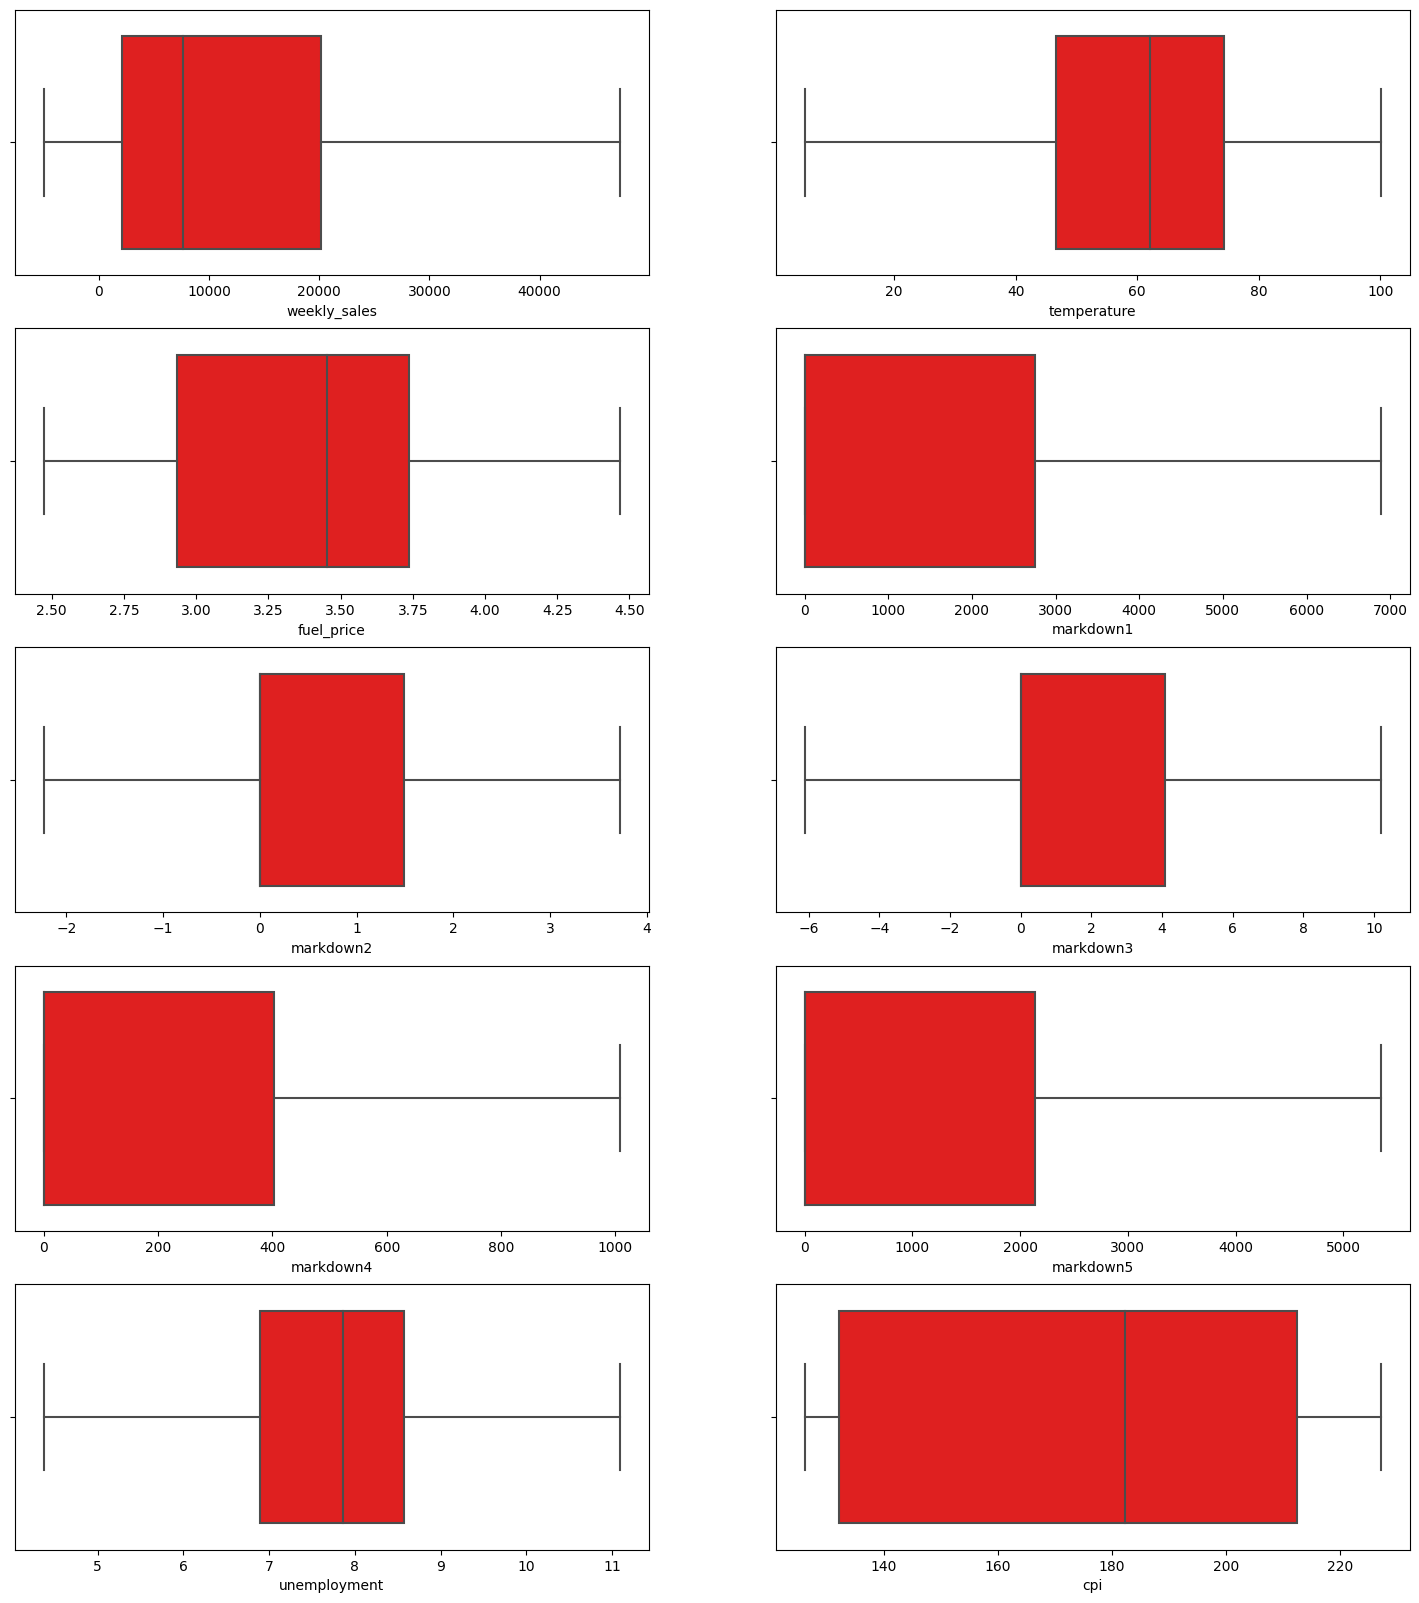

In [35]:
columns = ['weekly_sales', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'unemployment', 'cpi']
plt.figure(figsize=(18, 20))
for i,col in enumerate(columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'r')
plt.show()


#### 1.2   Categorical Features

* isholiday
* year
* season
* month_name
* day_of_week

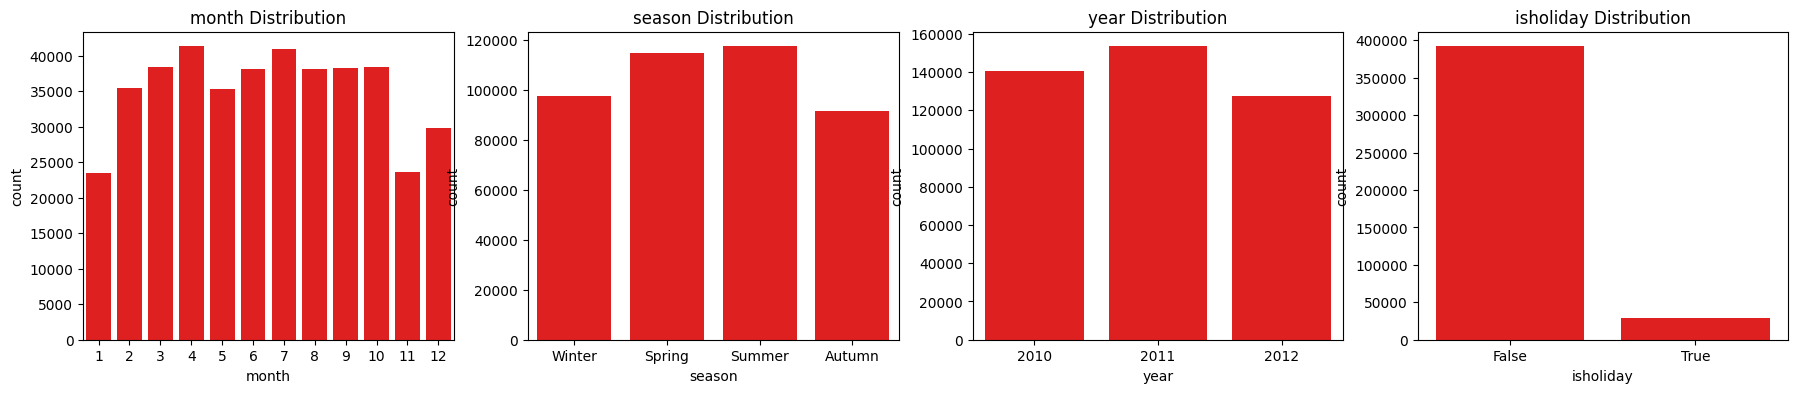

In [36]:
fig , ax = plt.subplots(1,4,figsize=(22,4))
cols = ['month','season','year','isholiday']
for i,col in enumerate(cols):
    sns.countplot(df,
                 x=col,
                 ax=ax[i],
                 color = 'Red'
                )
    ax[i].set_title(f'{col} Distribution')
fig.show()

##### 1.2.1 isholiday

In [37]:
df_holiday = df['isholiday'].value_counts()
df_holiday

False    391909
True      29661
Name: isholiday, dtype: int64

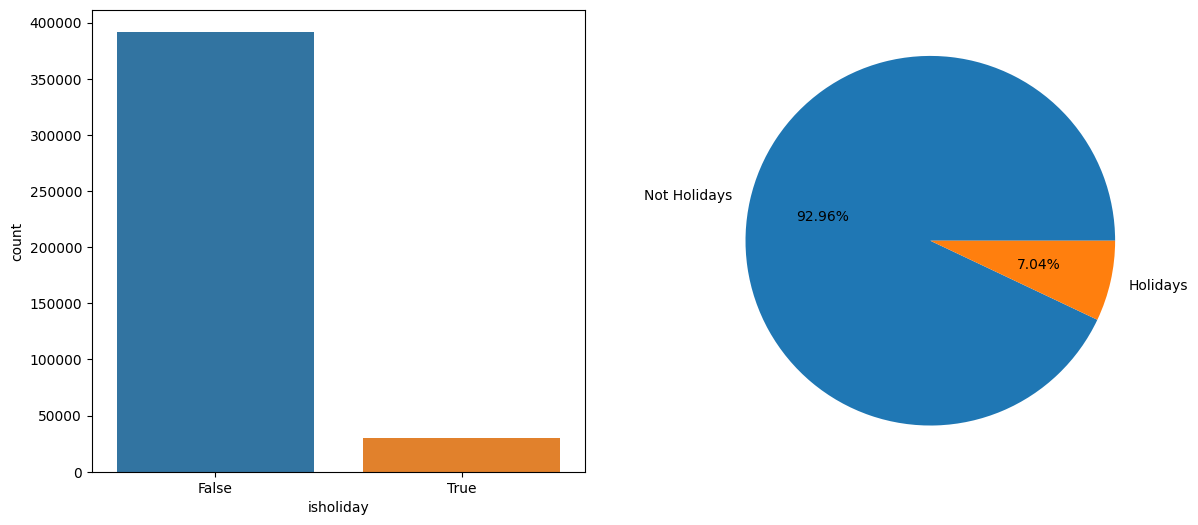

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'isholiday', ax = ax[0])

ax[1].pie(df['isholiday'].value_counts().values,
          labels = ['Not Holidays', 'Holidays'],
          autopct = '%1.2f%%')

plt.show()

Days of no holiday are the most frequent than days of holiday in the dataset with a percentage of 92.96% and this is normal.

##### 1.2.2 year

In [39]:
df['year'].value_counts()


2011    153453
2010    140679
2012    127438
Name: year, dtype: int64

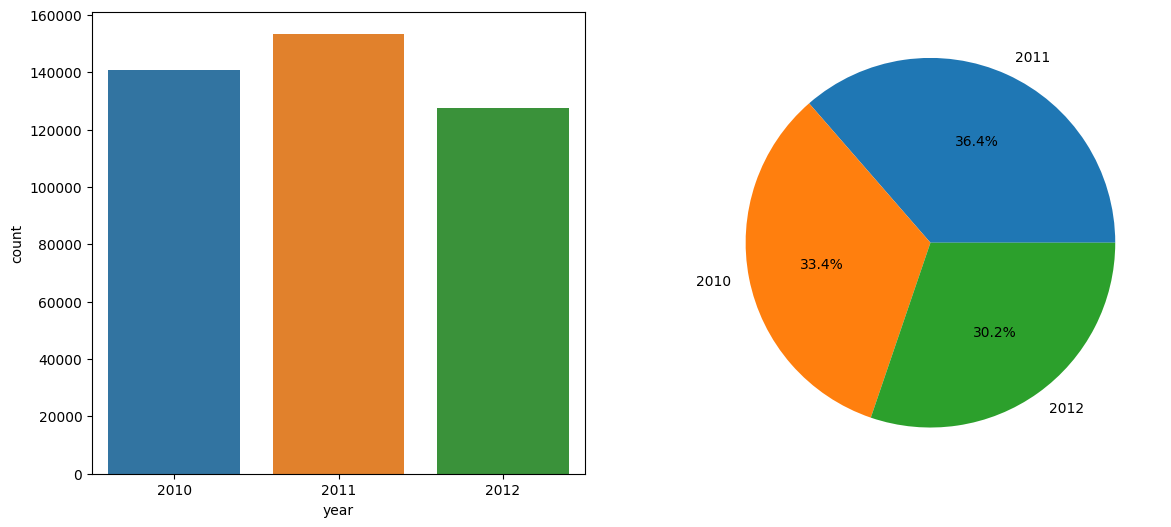

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'year', ax = ax[0])
ax[1].pie(df['year'].value_counts().values,
          labels = df['year'].value_counts().index,
          autopct = '%1.1f%%')
plt.show()

In 2011, the most of the weekly sales recorded with the percentage of 36.4% is the most frequent one in the dataset.

##### 1.2.3 season

In [41]:
df['season'].value_counts()


Summer    117488
Spring    114783
Winter     97522
Autumn     91777
Name: season, dtype: int64

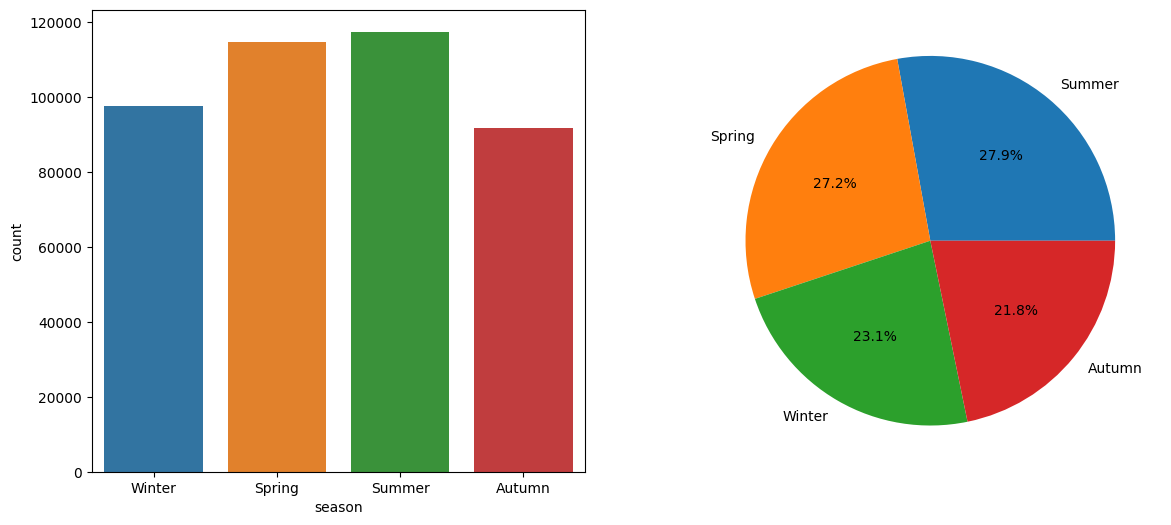

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'season', ax = ax[0])
ax[1].pie(df['season'].value_counts().values,
          labels = df['season'].value_counts().index,
          autopct = '%1.1f%%')
plt.show()

From the dataset summer is the most frequent season with 27.9% which means summer season is observed the most weekly sales during the season and spring with 27.2%, winter with 23.1% and lastly autumn 21.8% are following the seasons.

##### 1.2.4 month name

In [43]:
df['month_name'].value_counts()


April        41332
July         40980
March        38451
October      38362
September    38339
August       38169
June         38137
February     35526
May          35314
December     29802
November     23613
January      23545
Name: month_name, dtype: int64

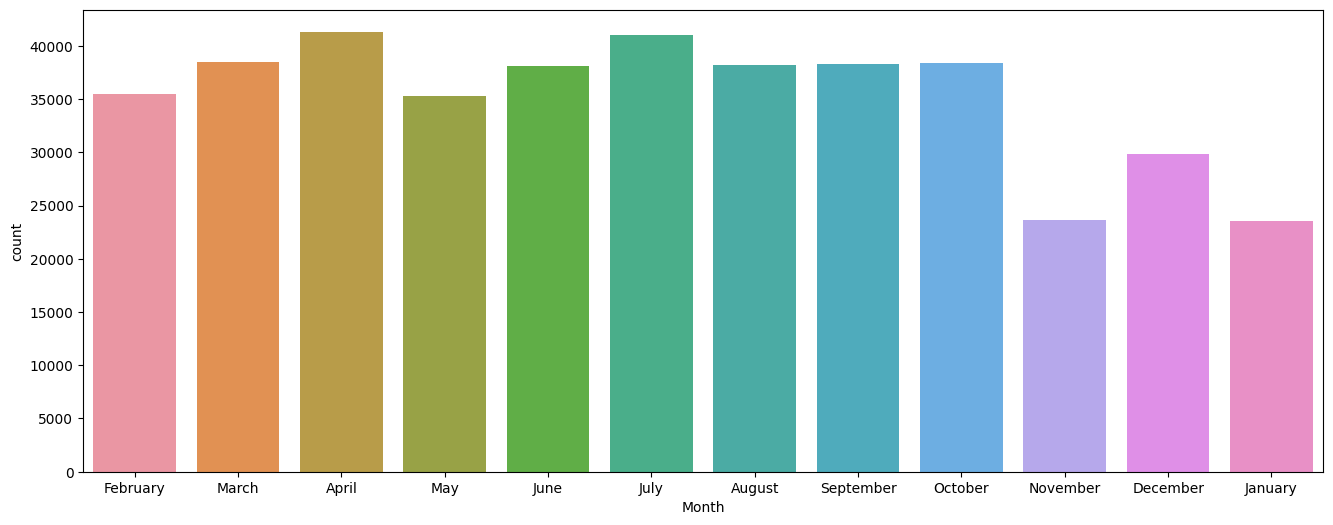

In [44]:
plt.figure(figsize=(16, 6))
sns.countplot(data = df, x = 'month_name')
plt.xlabel('Month')
plt.show()

April and July are the most frequent in the dataset because most of the weekly sales were recorded in these months.


##### 1.2.5 store and department

In [45]:
df['store'].nunique() # number of different values

45

In [46]:
df['dept'].nunique() # number of different values

81

There are 45 stores and 81 departments in Walmart stores.

In [47]:
store_dept_table = pd.pivot_table(df, index='store', columns='dept',
                                  values='weekly_sales', aggfunc=np.mean)
display(store_dept_table)

dept      1      2      3      4      5      6      7      8      9      10  \
store                                                                         
1     22,242 45,313 13,082 36,957 23,405  4,802 22,267 35,718 28,006 31,033   
2     28,568 47,303 16,682 44,939 27,904  6,808 32,453 47,303 33,640 38,829   
3      7,329 16,842  5,509  8,434 11,695  2,012  9,999  8,310  9,062 10,872   
4     33,809 47,303 17,604 47,303 39,855  8,242 39,758 47,303 34,036 37,219   
5      9,775 12,318  4,101  9,861  6,699  1,191  6,124 13,736  7,920  9,783   
6     23,429 46,572 16,418 34,187 31,977  7,226 29,504 46,148 42,658 45,073   
7      9,543 22,604  8,634 14,951 13,670  6,330 10,890 13,971 28,340 21,137   
8     14,782 35,704 10,653 21,089 19,377  3,395 18,869 26,439 11,793 20,666   
9     11,847 24,969  7,497 17,166 18,952  2,806 13,535 21,424 13,197 12,810   
10    33,543 47,303 26,942 46,750 43,991 10,506 42,975 47,303 47,266 45,986   
11    18,748 47,294 16,861 28,838 34,220  5,925 29,348 34,415 19,056 23,450   
12    17,275 47,303 16,181 26,674 26,015  6,741 28,851 42,219 19,553 17,975   
13    37,910 47,303 23,223 42,375 42,962  7,887 42,946 36,144 36,892 29,404   
14    26,106 47,303 18,286 46,665 29,653  7,017 37,862 46,763 22,026 20,166   
15    13,807 26,317 10,471 13,082 15,645  4,244 20,384 20,417 15,955 11,525   
16    11,352 23,549  7,635 14,748 13,295  5,146 11,410 14,677 25,657 12,682   
17    22,317 41,110 18,967 23,954 25,524  5,944 18,965 20,110 27,110 14,165   
18    20,893 47,207 15,402 26,775 21,395  5,665 27,560 32,037 18,589 16,755   
19    20,291 46,860 17,082 31,366 26,417  5,949 29,948 42,406 30,271 27,562   
20    35,426 47,303 15,491 47,091 35,855  8,159 37,167 47,303 36,498 41,134   
21    14,950 46,085 13,808 19,355 15,395  3,989 20,642 18,238 16,388 14,696   
22    20,251 47,110 12,966 32,104 21,688  5,237 25,455 37,208 23,453 19,438   
23    29,757 47,303 18,799 27,324 32,136  7,393 35,701 36,639 41,479 31,053   
24    18,360 40,436 11,826 29,245 27,581  4,911 26,314 46,812 23,247 27,175   
25    19,789 36,692 11,788 20,351 12,138  3,760 16,971 29,858 14,636 20,203   
26    19,403 27,396  7,357 24,498 17,246  4,657 15,644 28,695 16,556 10,173   
27    28,214 47,303 18,567 43,077 25,705  7,731 35,070 41,968 29,038 36,745   
28    20,065 47,303 12,466 27,981 26,748  5,016 25,378 33,376 17,931 21,083   
29    15,447 25,182  7,996 14,326 12,646  3,290 15,921 20,680 11,371  9,400   
30     9,788 12,974    740 13,216    406     27    380 11,734     77    196   
31    17,357 47,303 10,551 34,849 18,135  3,490 18,998 25,278 10,816 19,912   
32    22,608 46,976 15,140 28,137 19,459  4,590 22,289 24,681 20,740 22,887   
33     2,379  7,471    284  6,108    113     12    393  3,680     43     80   
34    19,928 34,900  8,377 19,792 20,849  3,419 17,041 27,165 17,224 16,957   
35    17,012 43,149 14,042 19,496 22,620  7,256 26,373 18,416 15,657 14,818   
36     2,239 13,416    381  9,874    315     26    414  3,418    102    175   
37    11,024 16,511  1,298 17,614  1,138     46    825 16,151    151    388   
38     6,924 10,986    499 10,670    397     37    414  9,485     78    365   
39    21,370 47,303 17,938 43,560 22,227  4,912 33,248 36,068 19,396 14,919   
40    18,759 26,648  6,489 24,387 17,383  4,003 17,985 33,972 19,065 19,613   
41    22,751 45,968 15,615 30,539 23,583  5,268 29,289 33,644 31,959 15,194   
42    10,375 15,977    814 14,885  1,052      3    722 18,239    136    405   
43     7,384 20,723  1,000 18,227    575     38    517 13,185    148    507   
44     8,050  9,377    571  7,404    961     35    531  4,964    100    154   
45    17,252 35,626  9,508 24,230 15,452  3,554 20,975 34,028 15,486 14,245   

dept   ...     90     91     92     93     94     95     96     97     98  99  
store  ...                                                                     
1      ... 47,303 47,303 47,303 47,303 47,292 47,303 33,212 35,207 11,828 306  
2      ... 47,303 47,303 45,082 47,303 47,303 

Store numbers are located 1 to 45 but even though the department numbers are 81, it is located to 1 to 99 which means some numbers are missing.

Also some NaN, 0 and minus values are located to the pivot table which have no chance to be in the sales.

In [48]:
df.loc[df['weekly_sales']<=0]

store  dept       date  weekly_sales  isholiday  temperature  \
188         1    47 2010-02-19          -863      False           40   
406         1    47 2010-03-12          -698      False           58   
2549        1    47 2010-10-08           -58      False           64   
3632        1    54 2011-01-21           -50      False           44   
4132        1    47 2011-03-11             0      False           54   
...       ...   ...        ...           ...        ...          ...   
420066     45    49 2012-05-25            -5      False           67   
420403     45    49 2012-06-29           -34      False           75   
420736     45    49 2012-08-03            -2      False           77   
421007     45    54 2012-08-31             0      False           75   
421142     45    49 2012-09-14            -7      False           68   

        fuel_price  markdown1  markdown2  markdown3  ...  unemployment  type  \
188              3          0          0          0  ...             8     A   
406              3          0          0          0  ...             8     A   
2549             3          0          0          0  ...             8     A   
3632             3          0          0          0  ...             8     A   
4132             3          0          0          0  ...             8     A   
...            ...        ...        ...        ...  ...           ...   ...   
420066           4      5,370          0         10  ...             9     B   
420403           4      3,291          4          0  ...             9     B   
420736           4      6,890          4         10  ...             9     B   
421007           4      6,890          4         10  ...             9     B   
421142           4      6,890          0          4  ...             9     B   

          size  year quarter  season  month  month_name week  day_of_week  
188     151315  2010       1  Winter      2    February    7       Friday  
406     151315  2010       1  Winter      3       March   10       Friday  
2549    151315  2010       4  Autumn     10     October   40       Friday  
3632    151315  2011       1  Winter      1     January    3       Friday  
4132    151315  2011       1  Winter      3       March   10       Friday  
...        ...   ...     ...     ...    ...         ...  ...          ...  
420066  118221  2012       2  Spring      5         May   21       Friday  
420403  118221  2012       2  Spring      6        June   26       Friday  
420736  118221  2012       3  Summer      8      August   31       Friday  
421007  118221  2012       3  Summer      8      August   35       Friday  
421142  118221  2012       3  Summer      9   September   37       Friday  

[1358 rows x 23 columns]

In [49]:
df.shape

(421570, 23)

It has 1358 rows have 0 or minus values in 421570 rows which means 0.32%. These rows can be deleted because it has less value for wrong sales.

In [50]:
df = df.loc[df['weekly_sales'] > 0]

In [51]:
df.shape

(420212, 23)

In [52]:
df['store'].value_counts()


13    10457
4     10267
10    10260
1     10226
2     10214
24    10210
34    10206
27    10196
6     10189
20    10173
32    10170
19    10114
31    10101
28    10099
41    10057
11    10033
23    10018
14    10005
40    10003
8      9883
15     9854
26     9844
39     9839
17     9812
18     9805
25     9768
7      9738
12     9665
22     9646
45     9610
21     9544
29     9424
16     9403
35     9402
3      9026
5      8978
9      8834
38     7351
37     7198
44     7142
30     7139
42     6907
43     6727
33     6478
36     6197
Name: store, dtype: int64

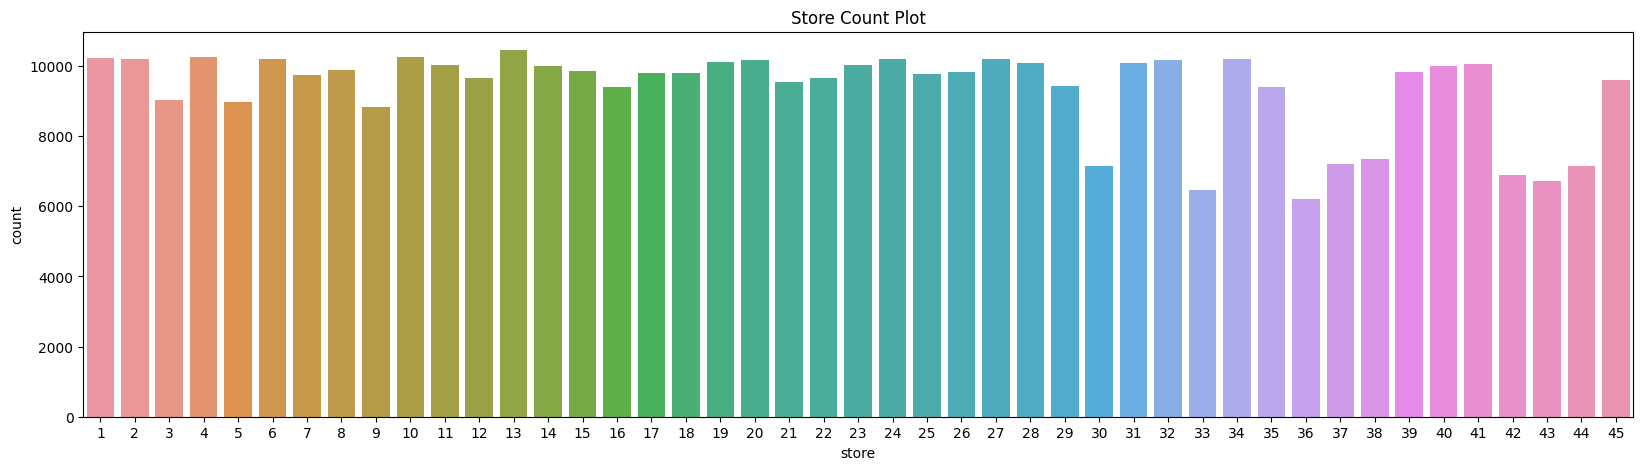

In [53]:
plt.figure(figsize=(20,5))
sns.countplot(df,x='store');
plt.title('Store Count Plot');
plt.show()

The most frequent store is 13 with 10457 units and the least one is 36 with 6197 units

### 2. Bivariate Analysis


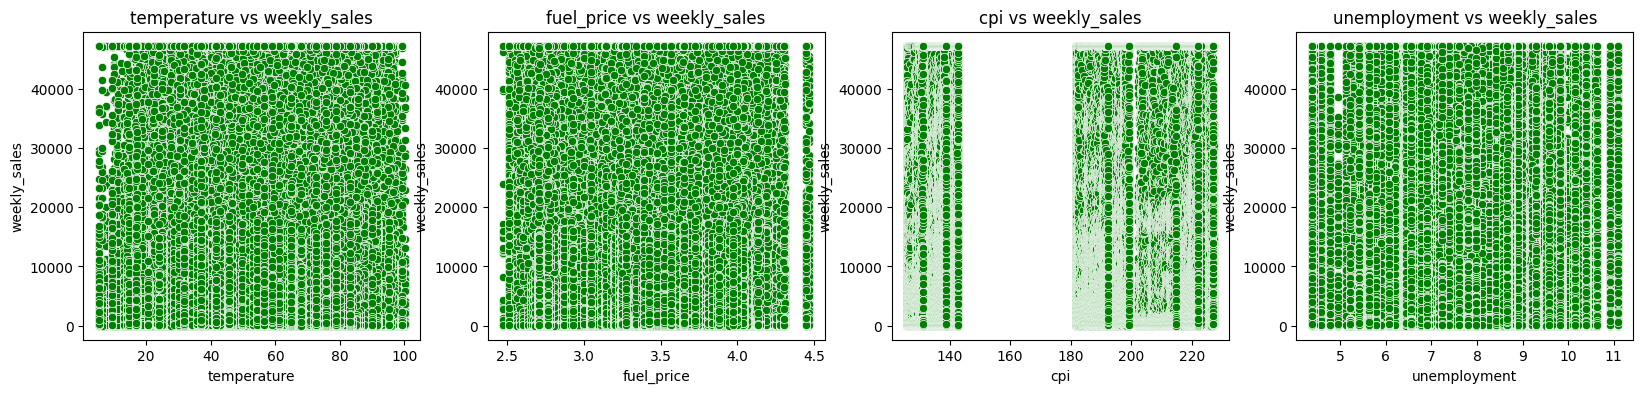

In [54]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
cols = ['temperature','fuel_price','cpi','unemployment']
for i,col in enumerate(cols):
    sns.scatterplot(df,
                 y='weekly_sales',x=col,
                 ax=ax[i],
                 color = 'green'
                )
    ax[i].set_title(f'{col} vs weekly_sales')
fig.show()

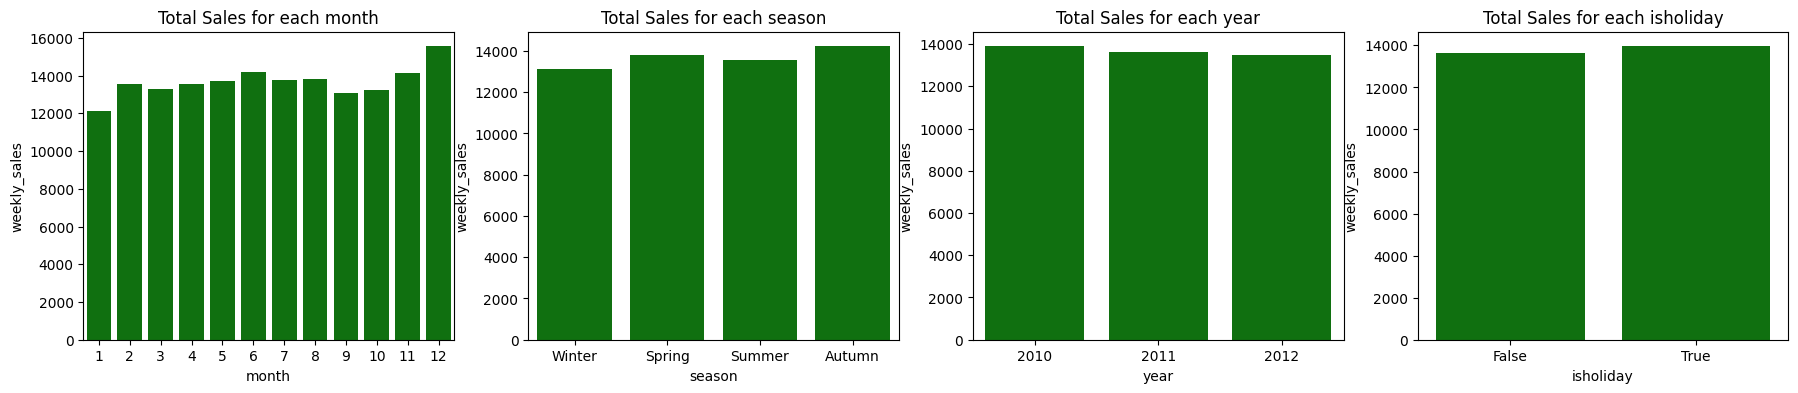

In [55]:
fig , ax = plt.subplots(1,4,figsize=(22,4))
cols = ['month','season','year','isholiday']
for i,col in enumerate(cols):
    sns.barplot(df,
                 x=col,y='weekly_sales',
                 ax=ax[i],
                 errorbar=None,
                 color='green'
                )
    ax[i].set_title(f'Total Sales for each {col}')
fig.show()

2.1 weekly_sales and isholiday


In [56]:
df.groupby("isholiday")["weekly_sales"].mean()

isholiday
False   13,648
True    13,951
Name: weekly_sales, dtype: float64

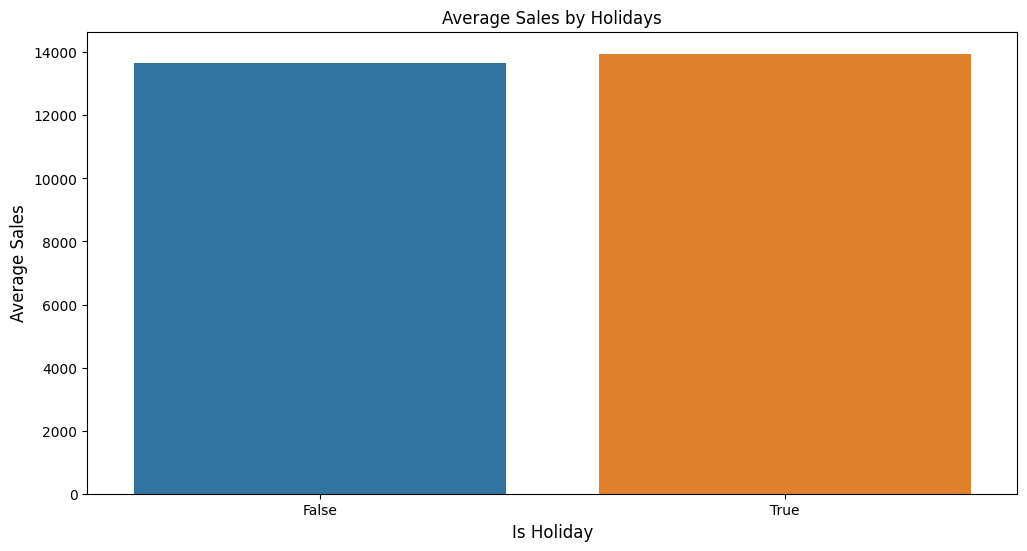

In [57]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df,
            x = 'isholiday',
            y = 'weekly_sales',
            estimator = np.mean,
            ci = False)

# Add labels and title
plt.title('Average Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Average Sales', size = 12)
plt.show()

The rate of sales on holidays is slightly higher than on other days.


In [58]:
df.groupby('isholiday')['weekly_sales'].sum()

isholiday
False   5,331,680,719
True      412,387,180
Name: weekly_sales, dtype: float64

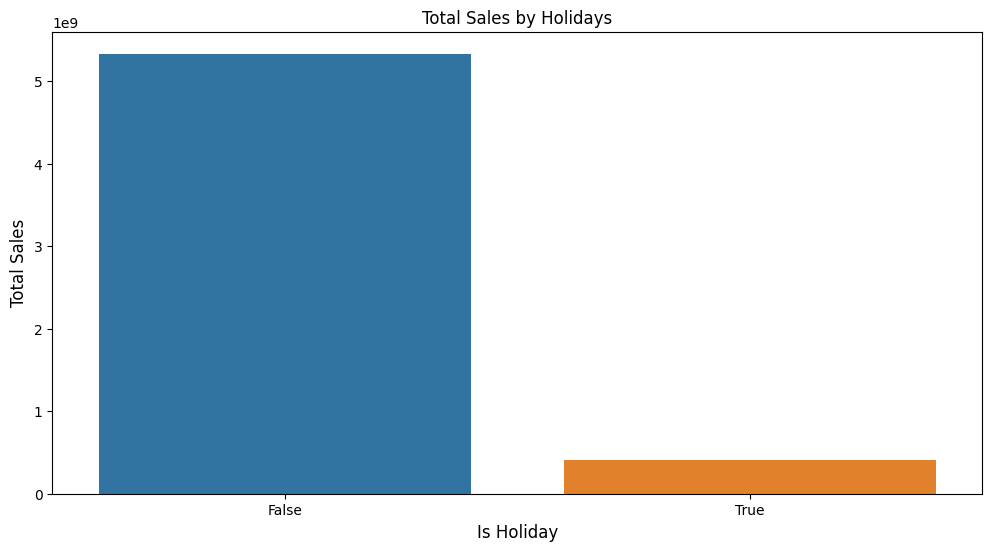

In [59]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df,
            x = 'isholiday',
            y = 'weekly_sales',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Total Sales', size = 12)
plt.show()

Total sales on holidays are lower than on other days, which is normal because the number of holidays is very small compared with the number of other days.


In [60]:
df['date'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: date, dtype: datetime64[ns]

In [61]:
df['date'].tail()

421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: date, dtype: datetime64[ns]

The data was collected from 5th of February 2010 to 26th of October 2012.

In [62]:
df_holiday = df.loc[df['isholiday']==True]
df_holiday['date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

Not all holidays were collected from the data. The holidays were collected are:


*   Super Bowl: 12.02.2010, 11.02.2011, 10.02.2012
*   Labor Day: 10.09.2010, 09.09.2011, 07.09.2012
*   Thanksgiving: 26.11.2010, 25.11.2011
*   Christmas: 31.12.2010, 30.12.2011





In [63]:
df_nonholiday = df.loc[df['isholiday']==False]
df_nonholiday['date'].nunique()

133

The test data has 10 holiday weeks and 133 non-holiday weeks.

In [64]:
# Superbowl train set
df.loc[(df['date'] == '2010-02-12')|(df['date'] == '2011-02-11')|(df['date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['date'] != '2010-02-12')&(df['date'] != '2011-02-11')&(df['date'] != '2012-02-10'),'Super_Bowl'] = False
# Laborday train set
df.loc[(df['date'] == '2010-09-10')|(df['date'] == '2011-09-09')|(df['date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['date'] != '2010-09-10')&(df['date'] != '2011-09-09')&(df['date'] != '2012-09-07'),'Labor_Day'] = False
# Thanksgiving train set
df.loc[(df['date'] == '2010-11-26')|(df['date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['date'] != '2010-11-26')&(df['date'] != '2011-11-25'),'Thanksgiving'] = False
#Christmas train set
df.loc[(df['date'] == '2010-12-31')|(df['date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['date'] != '2010-12-31')&(df['date'] != '2011-12-30'),'Christmas'] = False

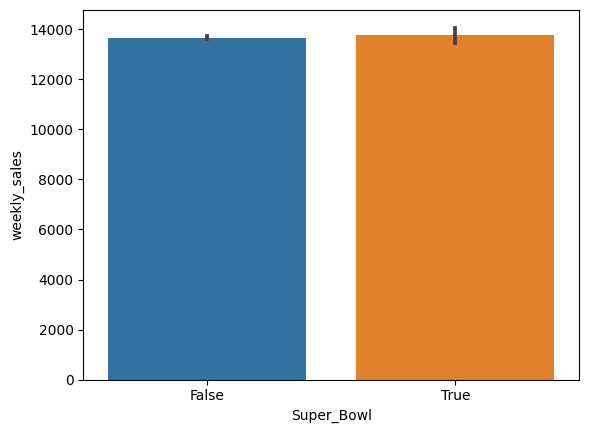

In [65]:
sns.barplot(x='Super_Bowl', y='weekly_sales', data=df);

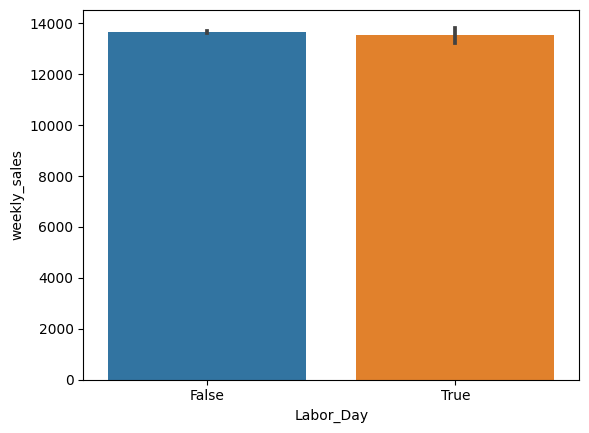

In [66]:
sns.barplot(x='Labor_Day', y='weekly_sales', data=df);

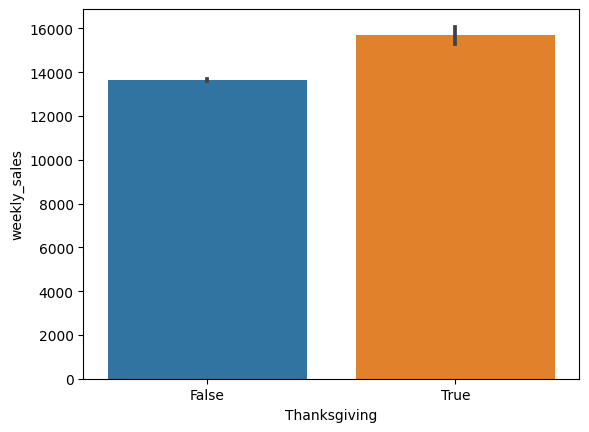

In [67]:
sns.barplot(x='Thanksgiving', y='weekly_sales', data=df);

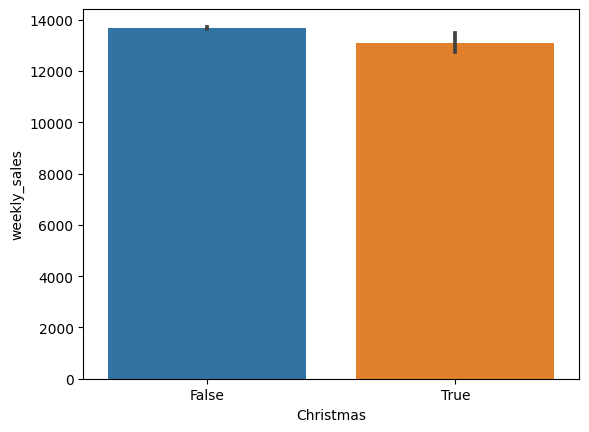

In [68]:
sns.barplot(x='Christmas', y='weekly_sales', data=df);

It is shown that Labor Day and Christmas do not increase weekly average sales from the graphs. There is slightly positive effect on sales in Super Bowl, but the highest weekly sales happened in Thanksgiving. Also, Black Friday sales in Thanksgiving week which is so effective to the sales of the week.

In [69]:
df.groupby(['Super_Bowl','type'])['weekly_sales'].mean()

Super_Bowl  type
False       A      16,419
            B      11,309
            C       8,781
True        A      16,527
            B      11,281
            C       9,175
Name: weekly_sales, dtype: float64

In [70]:
df.groupby(['Labor_Day','type'])['weekly_sales'].mean()

Labor_Day  type
False      A      16,427
           B      11,310
           C       8,785
True       A      16,156
           B      11,236
           C       8,995
Name: weekly_sales, dtype: float64

In [71]:
df.groupby(['Thanksgiving','type'])['weekly_sales'].mean()

Thanksgiving  type
False         A      16,388
              B      11,279
              C       8,788
True          A      18,742
              B      13,382
              C       8,884
Name: weekly_sales, dtype: float64

In [72]:
df.groupby(['Christmas','type'])['weekly_sales'].mean()

Christmas  type
False      A      16,429
           B      11,315
           C       8,805
True       A      15,874
           B      10,854
           C       7,724
Name: weekly_sales, dtype: float64

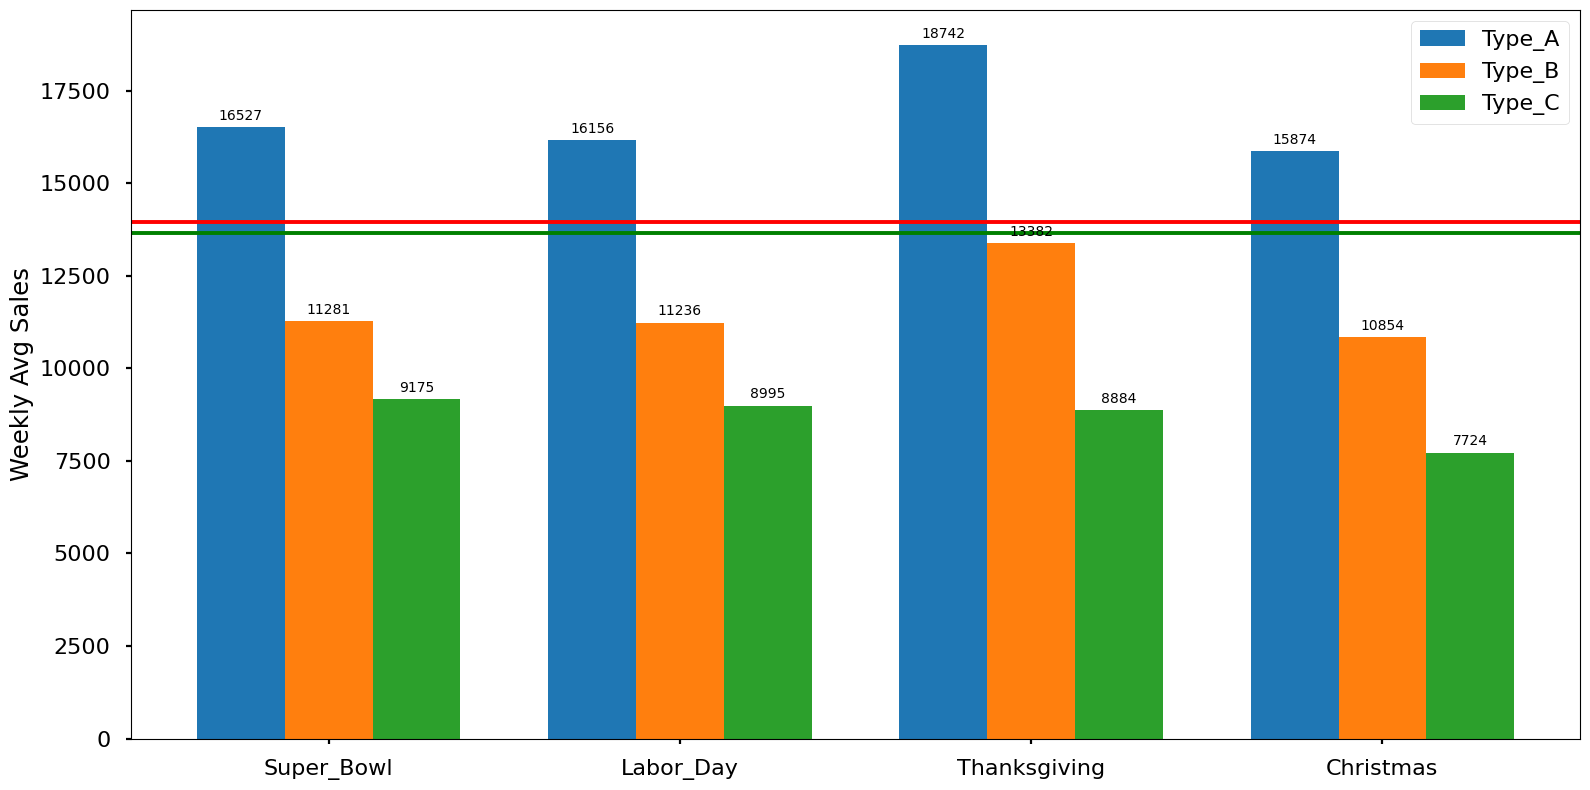

In [73]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']
A_means = [16527, 16156, 18742, 15874]
B_means = [11281, 11236, 13382, 10854]
C_means = [9175,8995,8884,7724]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=13951,color='r') # holidays avg
plt.axhline(y=13648,color='green') # non-holiday avg

fig.tight_layout()

plt.show()

Type A store has the highest sales marjin in the holiday sales.

2.2 weekly_sales and store

In [74]:
store_group = df.groupby('store')['weekly_sales'].sum().sort_values(ascending = False)
store_group

store
4    218,952,487
20   217,417,674
13   210,798,935
10   208,792,021
2    205,087,083
14   202,865,345
27   199,910,323
6    193,620,536
23   179,831,988
1    177,696,849
19   173,771,692
11   173,620,466
39   172,415,700
24   166,478,459
28   165,074,761
31   157,117,553
41   156,380,514
32   145,754,660
18   141,263,854
12   135,409,342
22   135,327,579
34   130,716,163
40   125,241,434
26   124,386,297
8    123,378,654
35   123,371,668
17   119,788,383
45   108,904,614
21   106,158,102
25    99,886,945
15    86,878,020
7     80,557,370
43    77,168,636
29    76,172,209
9     73,017,634
16    72,630,040
42    71,280,921
37    68,651,668
30    59,760,604
38    53,376,823
36    52,093,320
3     48,722,524
5     44,179,141
44    43,004,030
33    37,154,877
Name: weekly_sales, dtype: float64

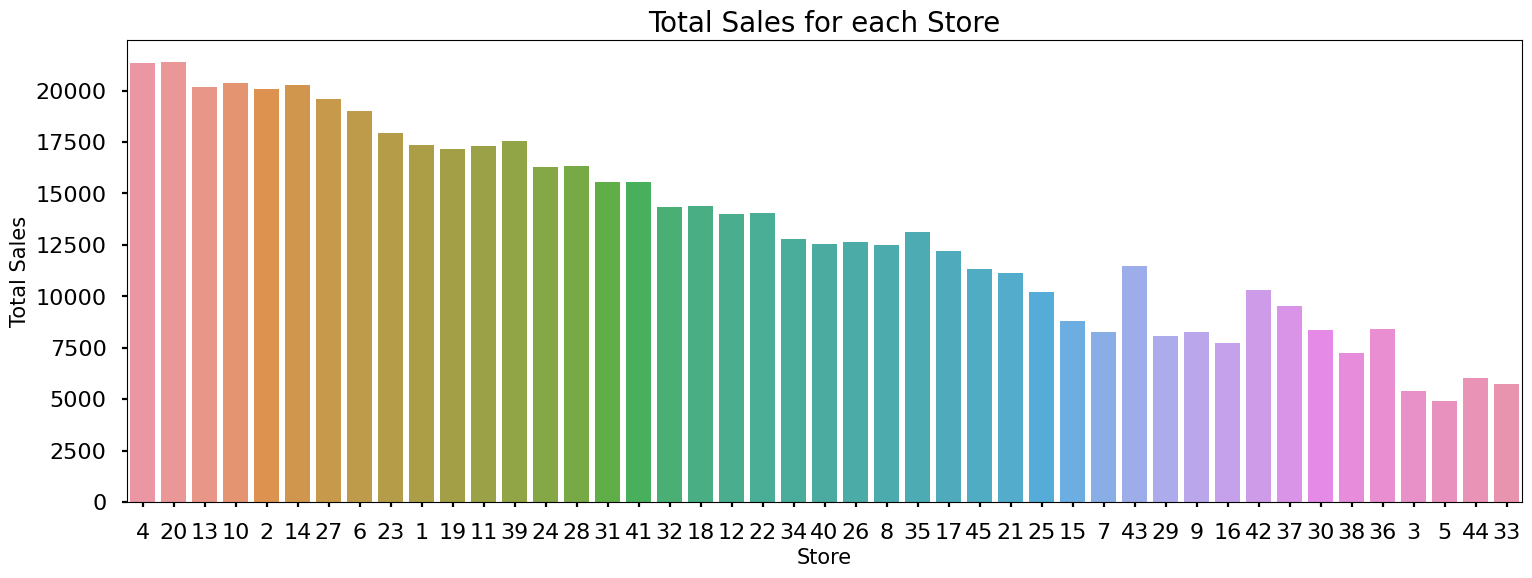

In [75]:
plt.figure(figsize = (18, 6))
sns.barplot(data = df,
            x = 'store',
            y = 'weekly_sales',
            order = store_group.index,
            ci = False)

# Add labels and title
plt.title('Total Sales for each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

Stores 4, 20, 13, 10, 2, 14 achieved the highest sales with sales over 200M while stores like 33, 44, 5, 3 achieved the lowest sales with sales between around 25M to 50M.

In [76]:
df['store'] = df['store'].astype('object')

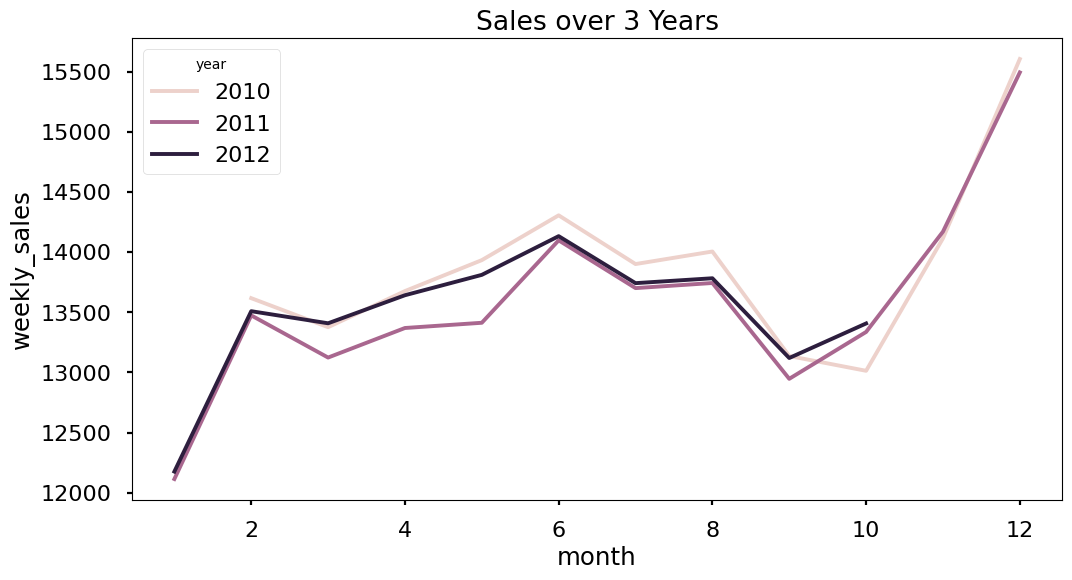

In [77]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["month"],y=df['weekly_sales'], hue=df['year'], ci=None);
plt.title('Sales over 3 Years');

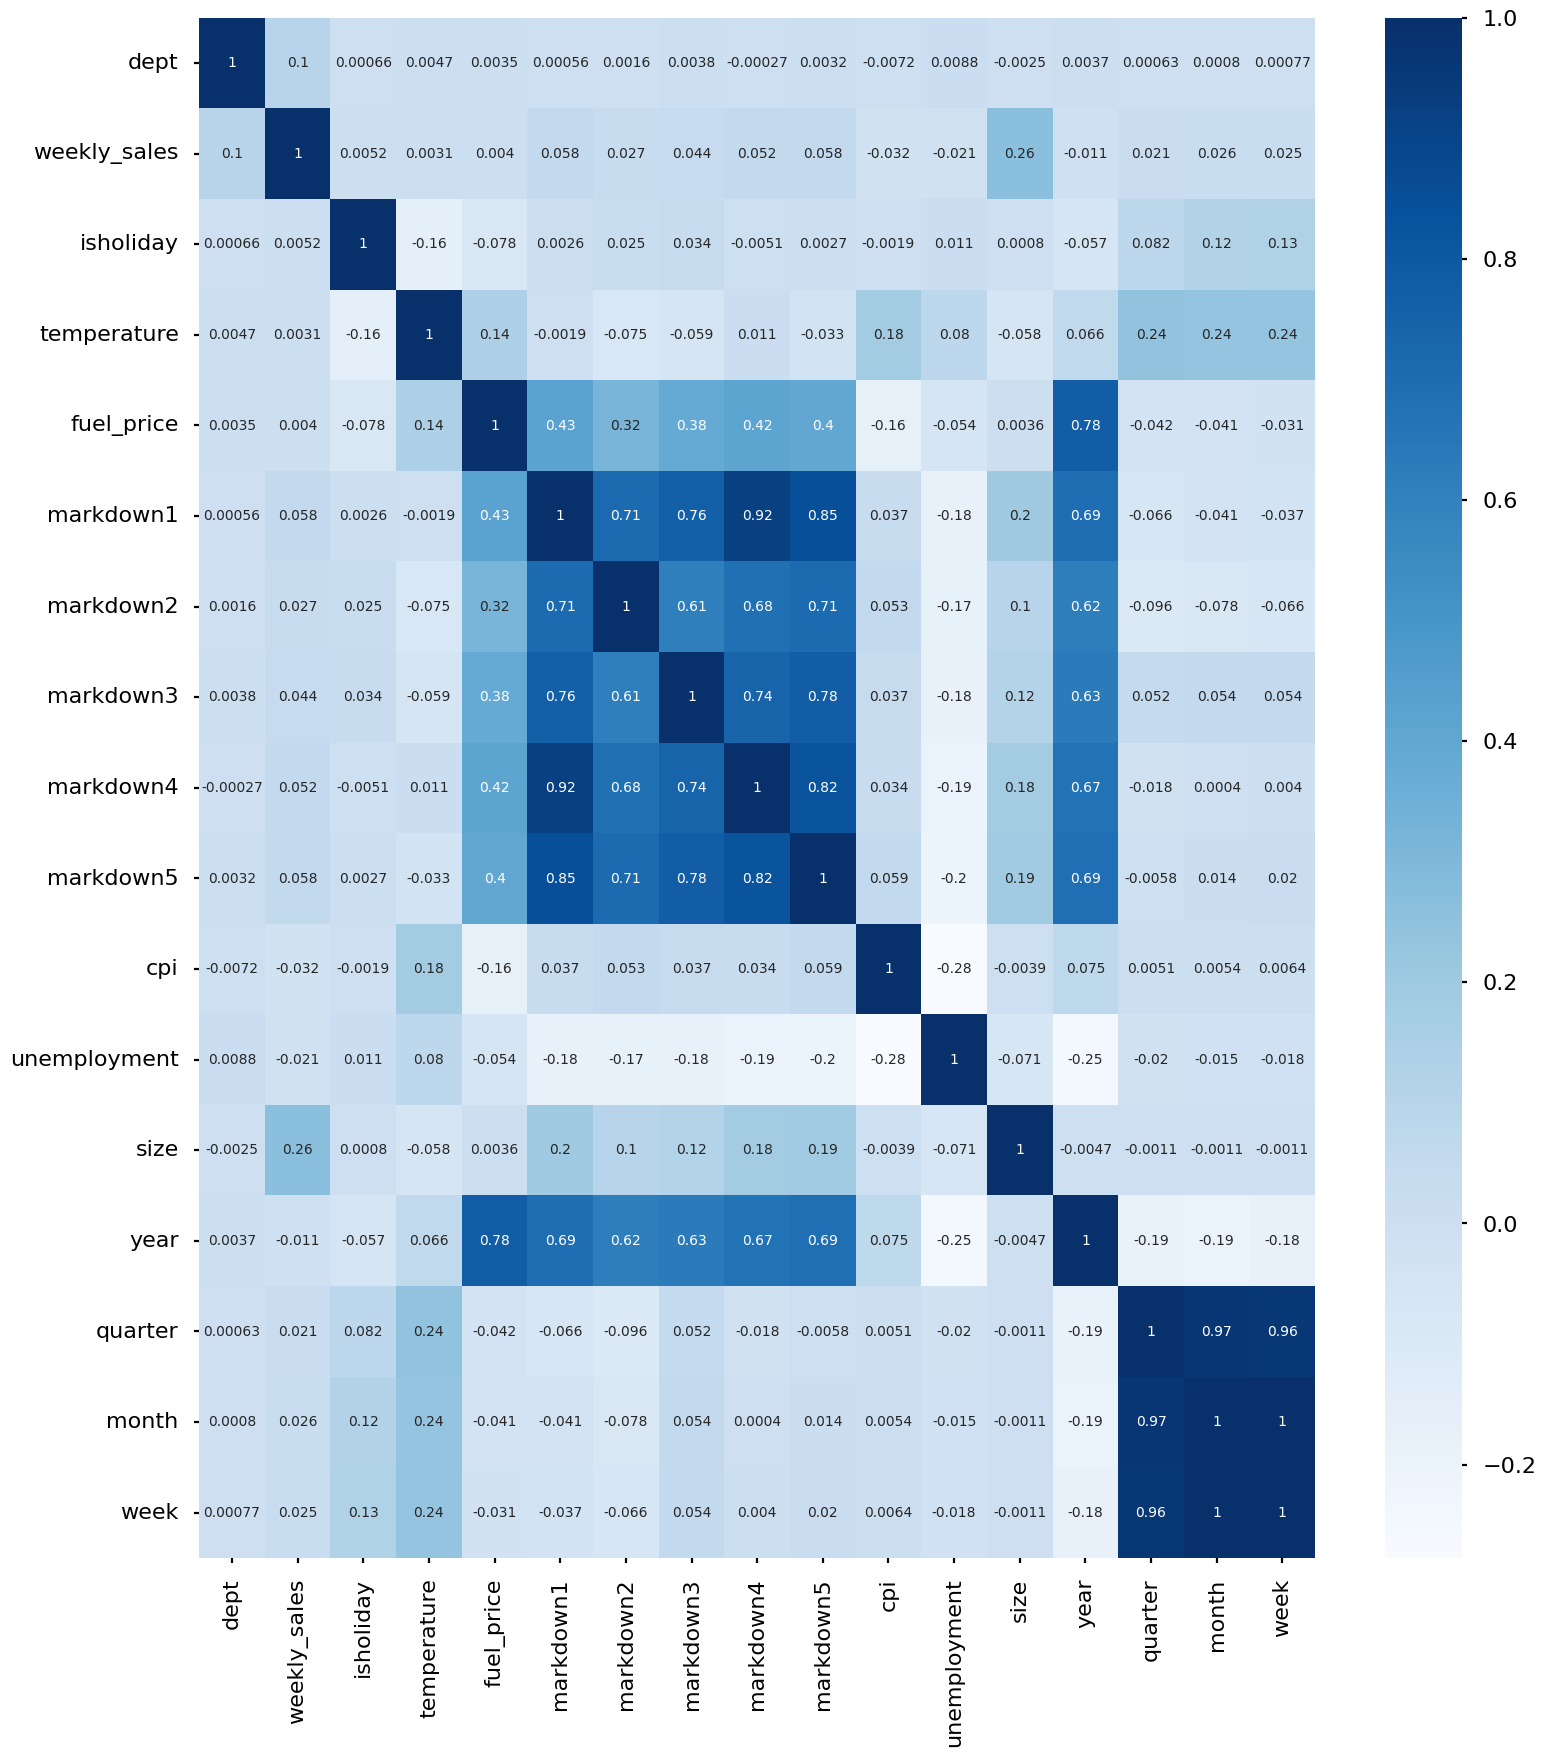

In [78]:
plt.figure(figsize=(18,20))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True);

2.3 weekly_sales and temperature

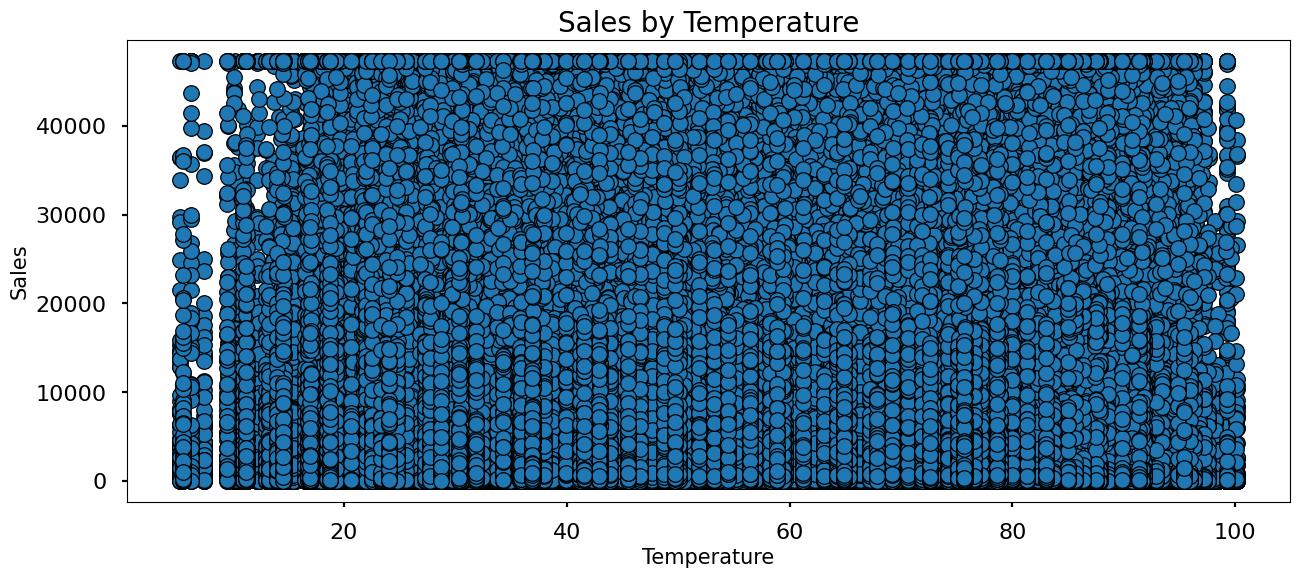

In [79]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df,
                x = 'temperature',
                y = 'weekly_sales',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Temperature', size = 20)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

Sales have no affected by temperature changes

2.4 weekly_sales and fuel_price

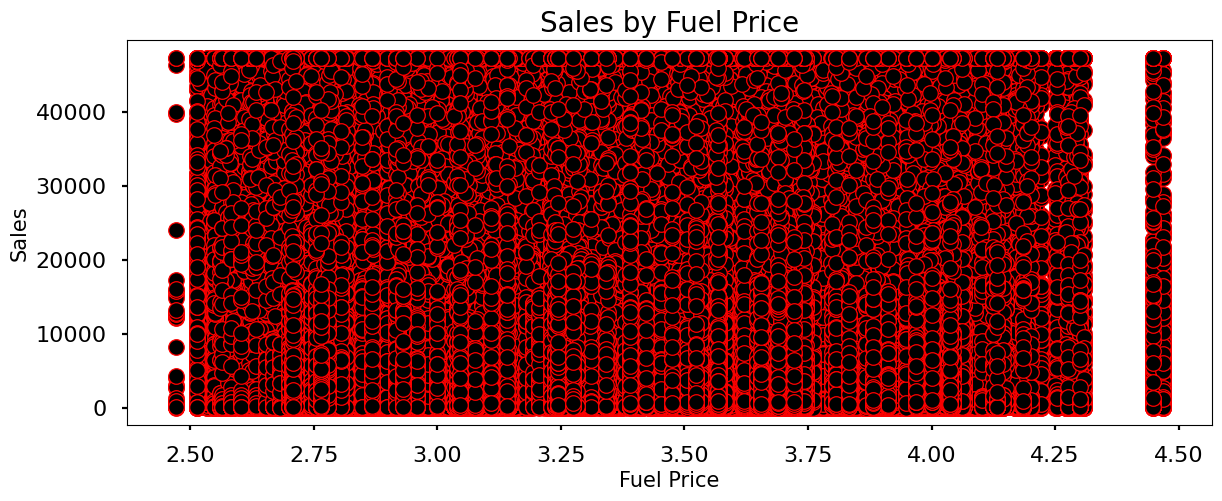

In [80]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,
                x = 'fuel_price',
                y = 'weekly_sales',
                color = 'black',
                edgecolor = "red")

# Add labels and title
plt.title('Sales by Fuel Price', size = 20)
plt.xlabel('Fuel Price', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

Sales have no affected by fuel price changes

2.5 weekly_sales and markdown1 to 5

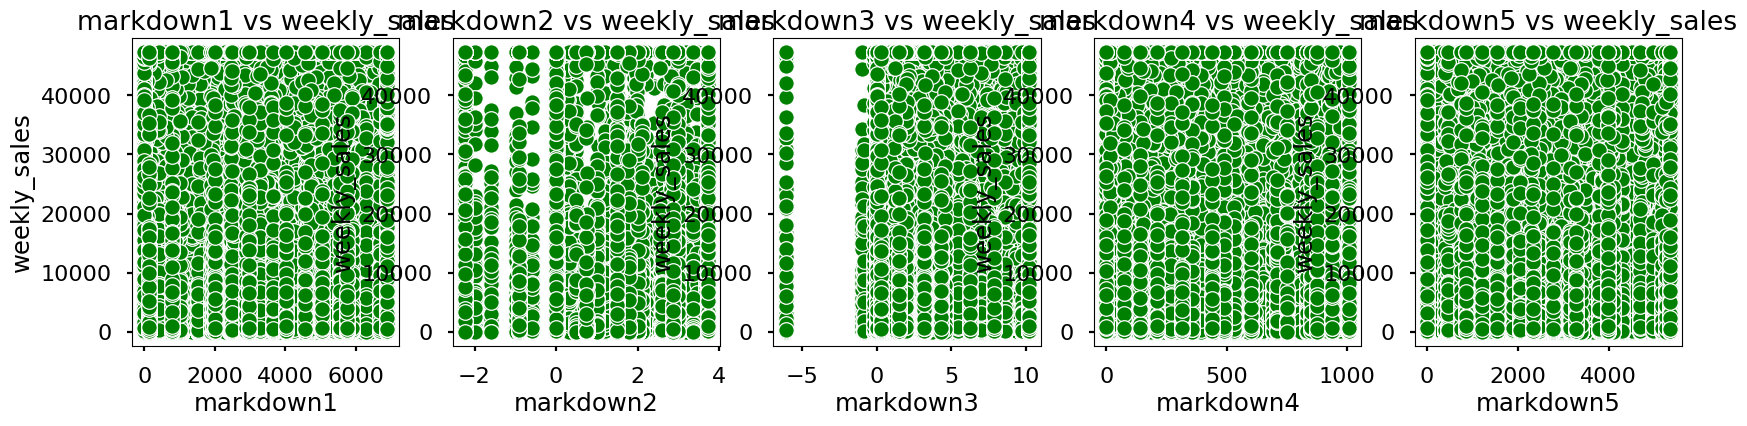

In [81]:
fig , ax = plt.subplots(1,5,figsize=(20,4))
cols = ['markdown1','markdown2','markdown3','markdown4','markdown5']
for i,col in enumerate(cols):
    sns.scatterplot(df,
                 y='weekly_sales',x=col,
                 ax=ax[i],
                 color = 'green'
                )
    ax[i].set_title(f'{col} vs weekly_sales')
fig.show()

markdown effect don't have any affection to the sales.

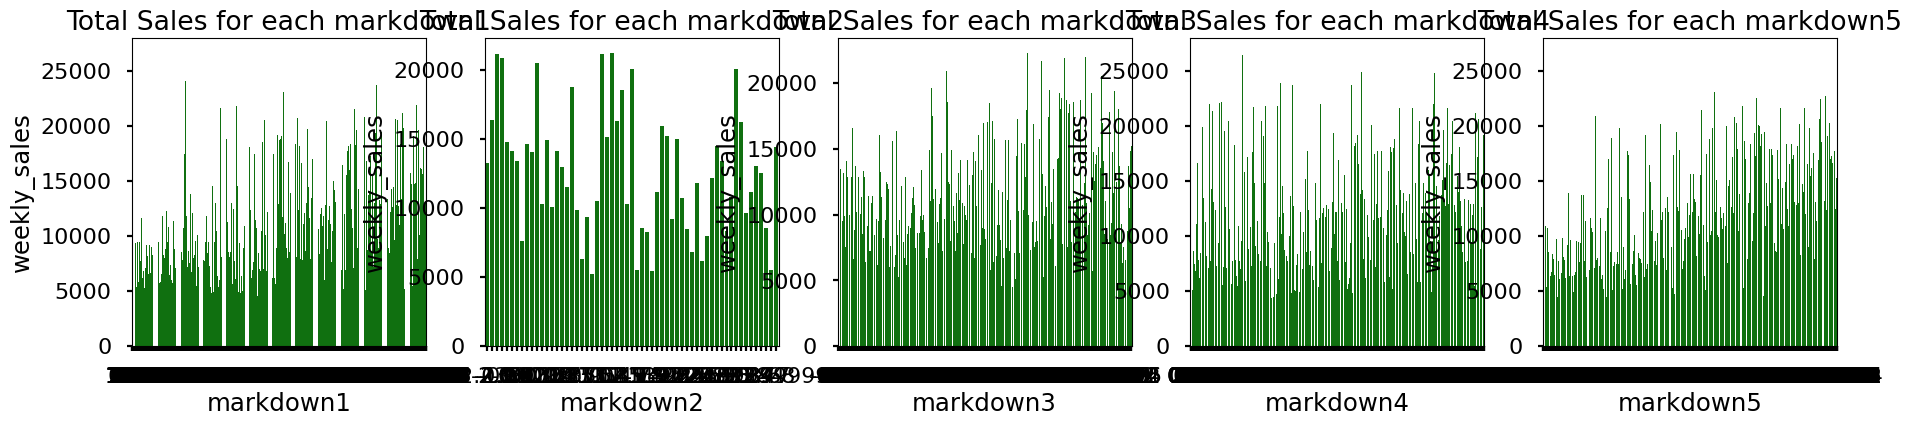

In [82]:
fig , ax = plt.subplots(1,5,figsize=(22,4))
cols = ['markdown1','markdown2','markdown3','markdown4','markdown5']
for i,col in enumerate(cols):
    sns.barplot(df,
                 x=col,y='weekly_sales',
                 ax=ax[i],
                 errorbar=None,
                 color='green'
                )
    ax[i].set_title(f'Total Sales for each {col}')
fig.show()

2.6 weekly_sales and cpi

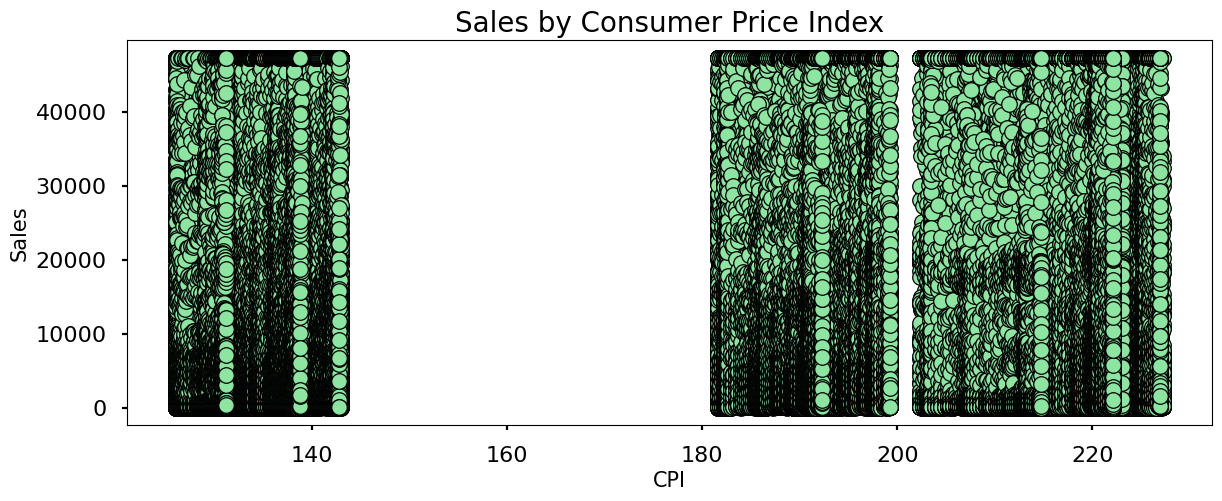

In [83]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,
                x = 'cpi',
                y = 'weekly_sales',
                color = '#8de5a1',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Consumer Price Index', size = 20)
plt.xlabel('CPI', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

cpi has no effect to sales but customer variation can be grouped by:


*   Lower class pays between 120 to 150
*   Middle class pays between 180 to 200
*   Upper class pays between 210 to 250



2.6 weekly_sales and unemployment

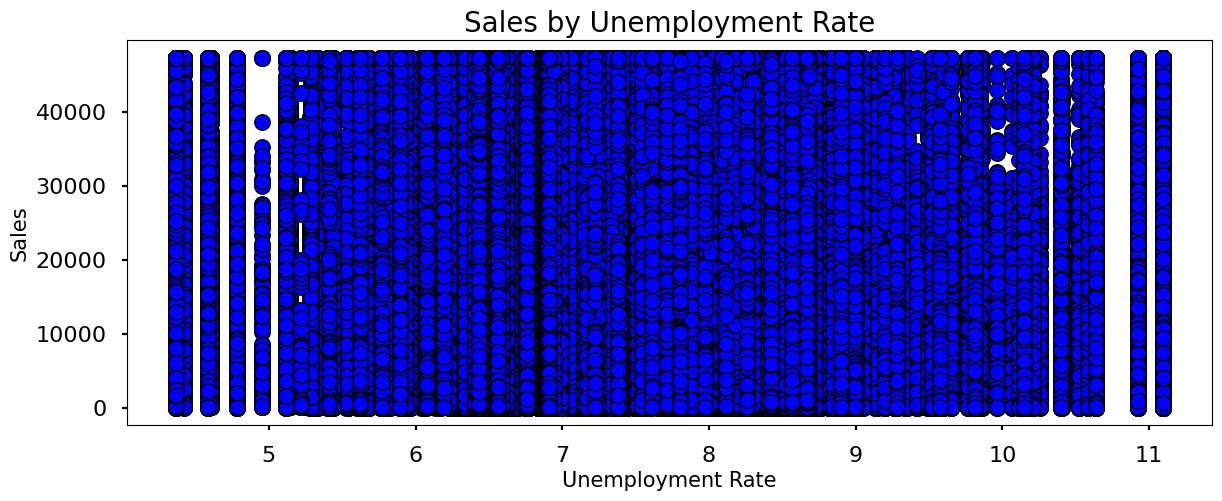

In [84]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,
                x = 'unemployment',
                y = 'weekly_sales',
                color = 'blue',
                edgecolor = 'black')

# Add labels and title
plt.title('Sales by Unemployment Rate', size = 20)
plt.xlabel('Unemployment Rate', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

Sales are not affected by unemployment changes

**Time Series Analysis**


In [85]:
df.groupby('year')['weekly_sales'].sum().sort_values(ascending = False)


year
2011   2,081,398,612
2010   1,948,888,824
2012   1,713,780,462
Name: weekly_sales, dtype: float64

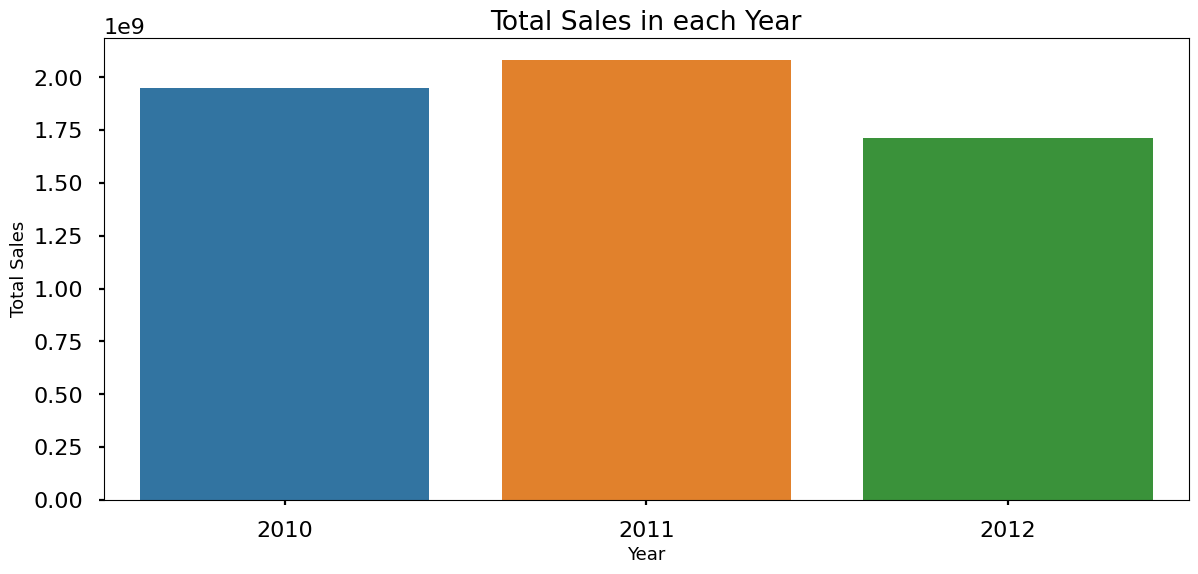

In [86]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df,
            x = 'year',
            y = 'weekly_sales',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Year')
plt.xlabel('Year', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

The highest sales observed in 2011 with 2,081,398,612$.

In [87]:
df.groupby('season')['weekly_sales'].sum().sort_values(ascending = False)

season
Summer   1,588,779,411
Spring   1,579,241,428
Autumn   1,301,364,147
Winter   1,274,682,912
Name: weekly_sales, dtype: float64

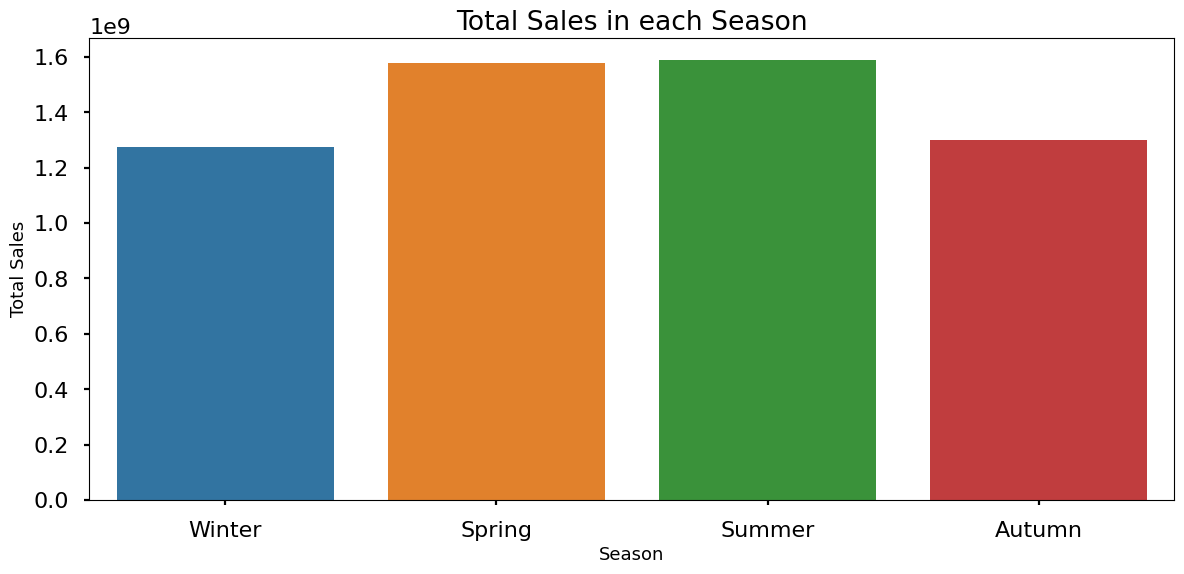

In [88]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df,
            x = 'season',
            y = 'weekly_sales',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Season')
plt.xlabel('Season', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

The highest sales were observed in Summer with 1,588,779,411$




In [89]:
df.groupby('month_name')['weekly_sales'].sum().sort_values(ascending = False)


month_name
July        563,300,484
April       558,687,448
June        538,227,955
August      526,513,695
March       510,245,606
October     506,552,589
September   498,965,233
May         482,326,024
February    479,600,734
December    461,700,028
November    333,111,529
January     284,836,571
Name: weekly_sales, dtype: float64

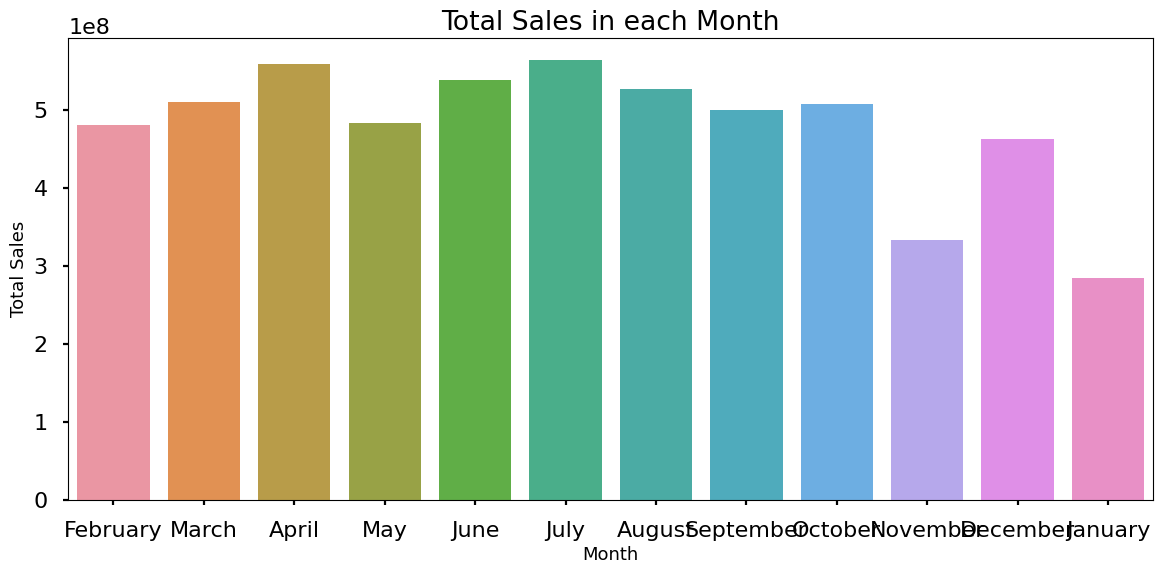

In [90]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df,
            x = 'month_name',
            y = 'weekly_sales',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

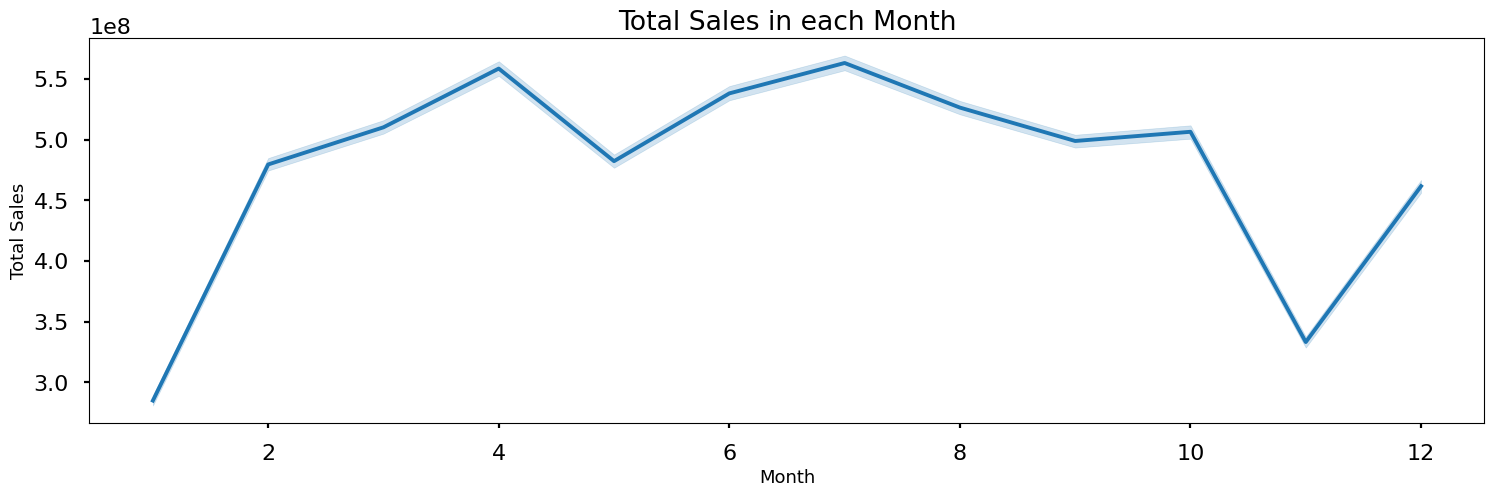

In [91]:
plt.figure(figsize = (18, 5))
sns.lineplot(data = df,
            x = 'month',
            y = 'weekly_sales',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

The highest sales were observed in July with 563,300,484$

In [92]:
week_group = df.groupby('week')['weekly_sales'].sum().sort_values(ascending = False)
week_group

week
22   126,857,043
27   125,479,417
7    125,055,350
14   124,640,009
23   124,301,542
24   123,698,099
26   123,609,411
31   122,826,235
25   122,729,780
21   122,483,138
6    122,122,433
18   121,812,131
33   121,374,362
34   121,331,434
32   120,401,338
13   120,325,370
35   119,852,608
16   119,613,832
36   119,573,496
19   119,571,074
28   119,474,128
40   119,027,674
29   118,984,803
9    118,774,584
11   118,471,167
20   118,459,682
15   118,396,687
43   118,105,876
5    117,549,354
10   117,532,821
42   116,499,173
30   116,394,216
12   115,924,590
41   115,763,986
17   115,253,996
8    114,873,598
37   113,150,029
39   112,097,309
38   112,027,999
51   111,202,747
50    96,927,726
47    93,221,409
49    91,609,236
48    84,490,479
44    80,793,776
45    80,510,764
46    78,585,579
52    77,469,840
1     74,160,275
3     70,996,617
2     70,501,538
4     69,178,141
Name: weekly_sales, dtype: float64

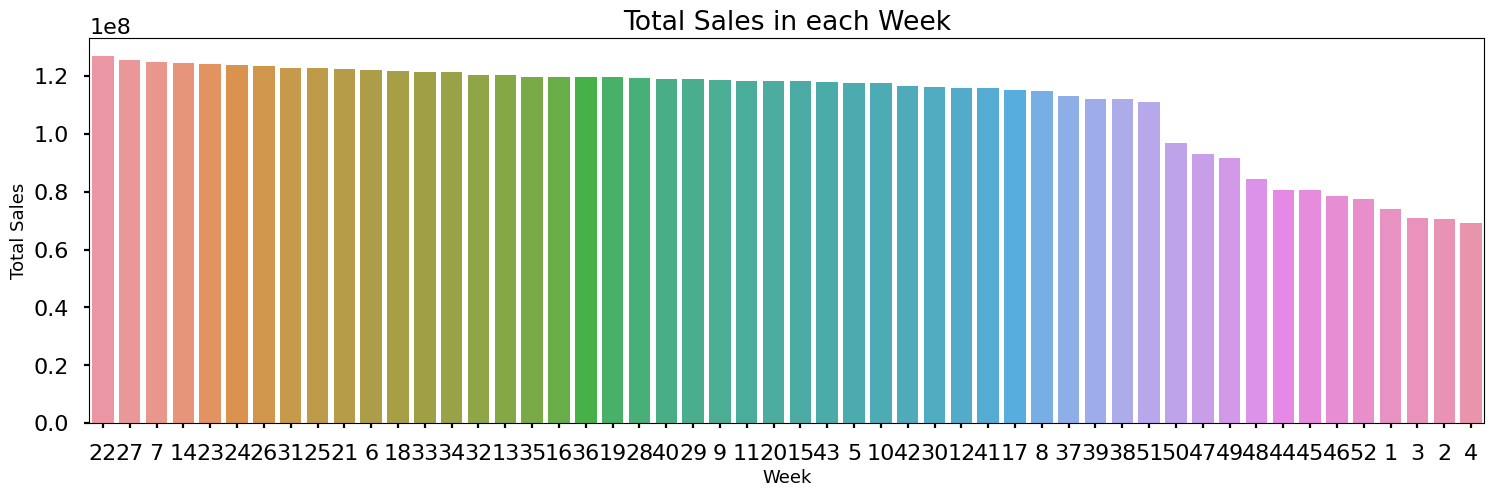

In [93]:
plt.figure(figsize = (18, 5))
sns.barplot(data = df,
            x = 'week',
            y = 'weekly_sales',
            estimator = np.sum,
            order = week_group.index,
            ci = False)

# Add labels and title
plt.title('Total Sales in each Week')
plt.xlabel('Week', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

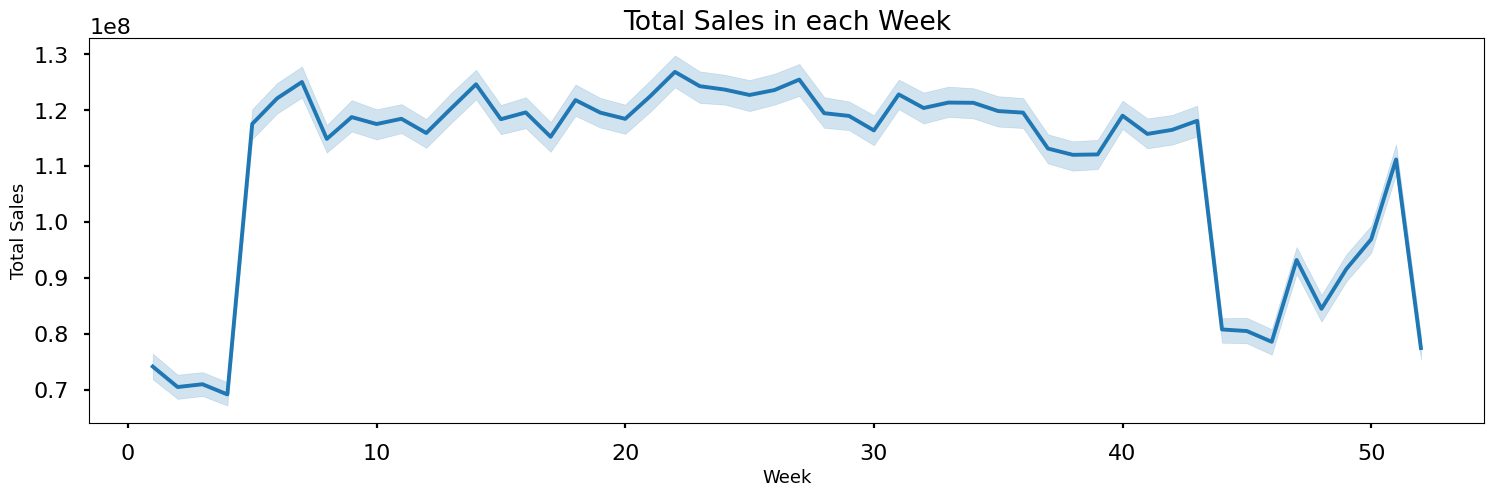

In [94]:
plt.figure(figsize = (18, 5))
sns.lineplot(data = df,
            x = 'week',
            y = 'weekly_sales',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales in each Week')
plt.xlabel('Week', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

The highest sales were observed in 22. week with 126,857,043$

In [95]:
pd.pivot_table(data = df,
               index = 'year',
               columns = 'month_name',
               values = 'weekly_sales',
               aggfunc = 'sum')

month_name       April      August    December    February     January  \
year                                                                     
2010       200,479,127 162,162,996 229,399,083 160,751,600         NaN   
2011       196,609,680 161,112,492 232,300,946 157,836,327 141,108,536   
2012       161,598,641 203,238,208         NaN 161,012,807 143,728,036   

month_name        July        June       March         May    November  \
year                                                                     
2010       201,949,515 166,158,410 157,196,537 161,946,794 164,901,929   
2011       199,689,942 164,463,965 154,401,414 157,949,275 168,209,600   
2012       161,661,027 207,605,580 198,647,656 162,429,956         NaN   

month_name     October   September  
year                                
2010       190,456,422 153,486,414  
2011       157,316,443 190,399,993  
2012       158,779,725 155,078,826

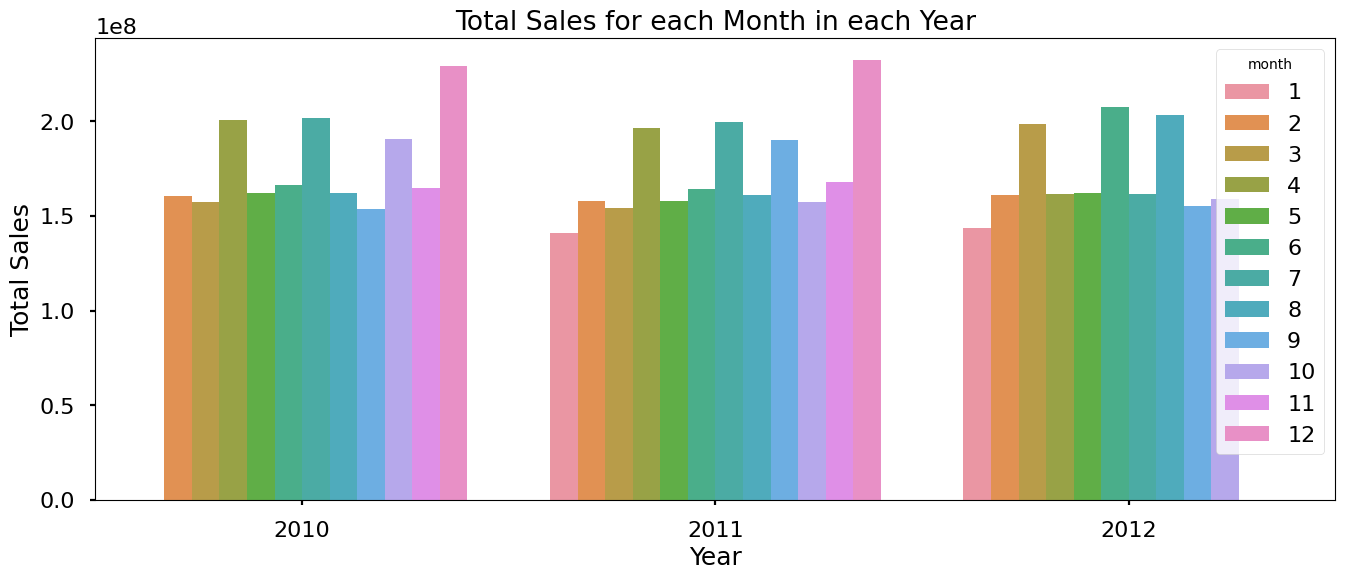

In [96]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df,
            x = 'year',
            y = 'weekly_sales',
            hue = 'month',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales for each Month in each Year')
plt.xlabel('Year', size = 18)
plt.ylabel('Total Sales', size = 18)

plt.show()

The total sales in 2010 is in December of 11 months with 229,399,083$

The total sales in 2011 is in December with 232,300,946$

The total sales in 2012 is June in 10 months with 207,605,580$

In [97]:
pd.pivot_table(data = df,
               index = 'year',
               columns = 'season',
               values = 'weekly_sales',
               aggfunc = 'sum')

season      Autumn      Spring      Summer      Winter
year                                                  
2010   584,757,433 528,584,330 517,598,924 317,948,136
2011   557,826,988 519,022,920 551,202,427 453,346,277
2012   158,779,725 531,634,178 519,978,061 503,388,499

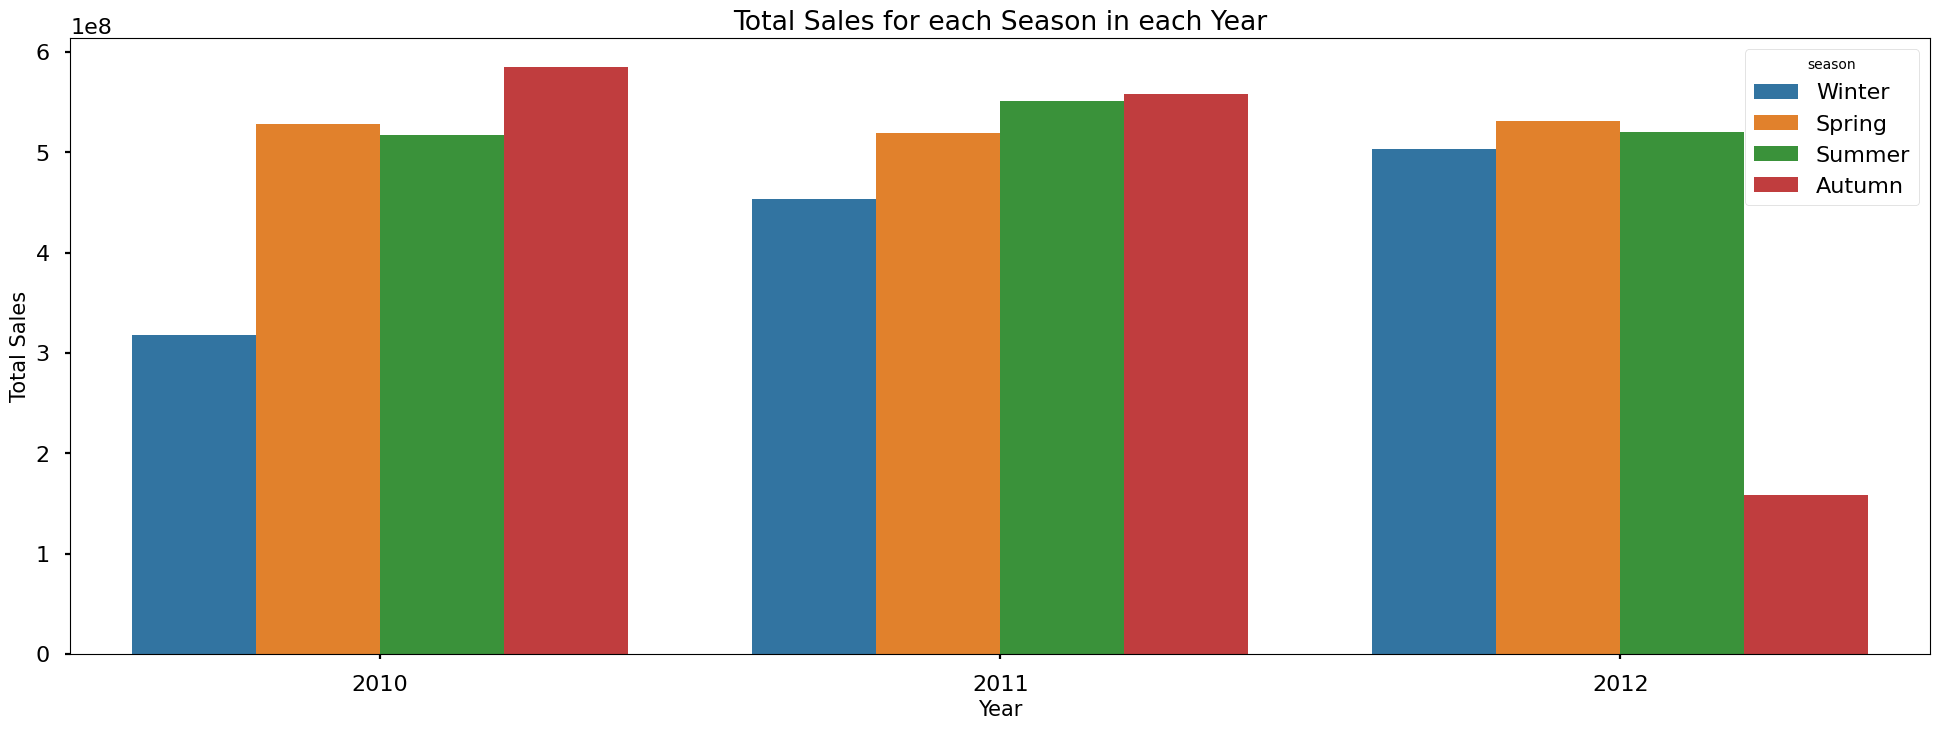

In [98]:
plt.figure(figsize = (24, 8))
sns.barplot(data = df,
            x = 'year',
            y = 'weekly_sales',
            hue = 'season',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales for each Season in each Year')
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

The highest total sales of three years from dataset was in Autumn 2010. In addition to this,

In 2010, the highest total sales was in Autumn with 584,757,433$

In 2011, the highest total sales was in Autumn with 557,826,988$

In 2012, the highest total sales was in Spring with 531,634,178$

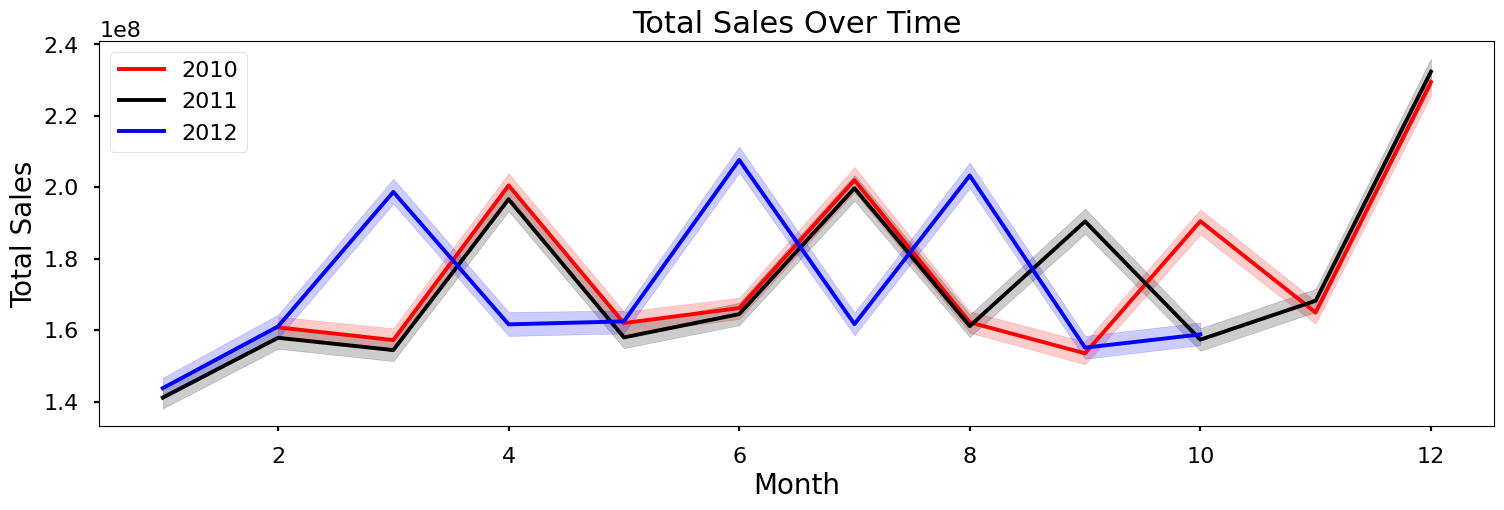

In [99]:
years = ['2010', '2011', '2012']
colors = ['red', 'black', 'blue']

plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = df[df['year'] == int(year)],
                 x = 'month',
                 y = 'weekly_sales',
                 estimator = np.sum,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Total Sales Over Time', size = 22)
plt.xlabel('Month', size = 20)
plt.ylabel('Total Sales', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Sales are the mostly same over the 3 years, but it was increased at the end of the year all the time which is understandable within the time between Thanksgiving and Christmas.

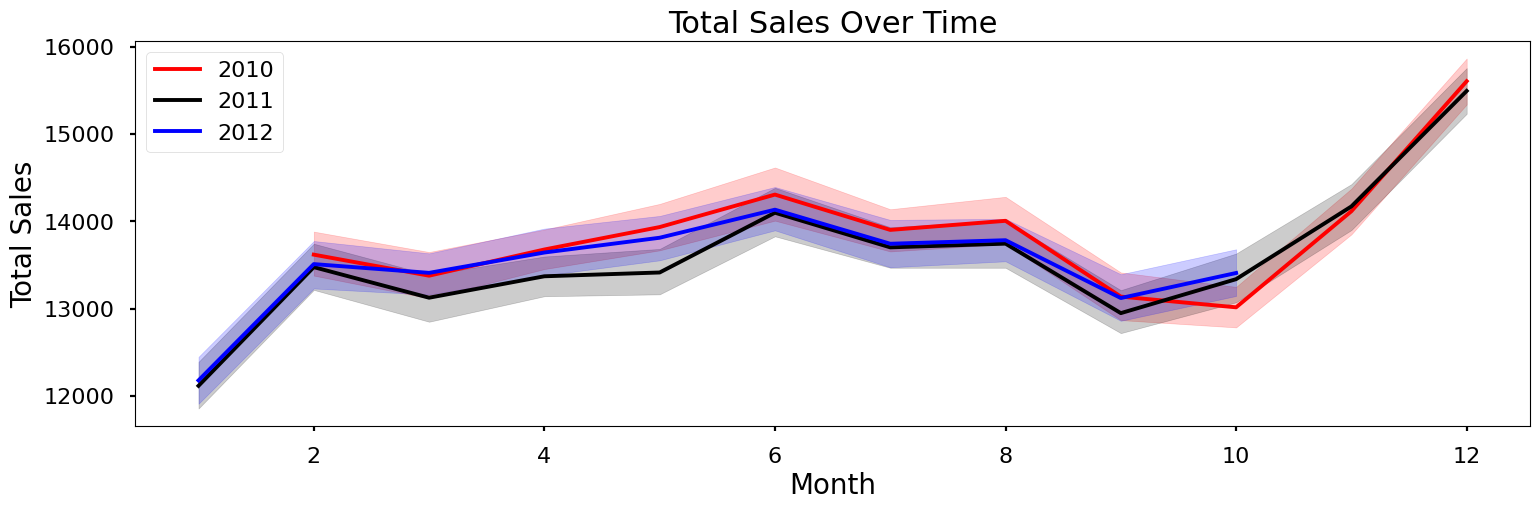

In [100]:
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = df[df['year'] == int(year)],
                 x = 'month',
                 y = 'weekly_sales',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Total Sales Over Time', size = 22)
plt.xlabel('Month', size = 20)
plt.ylabel('Total Sales', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Sales rates are generally similar within the years of 2010 and 2012.

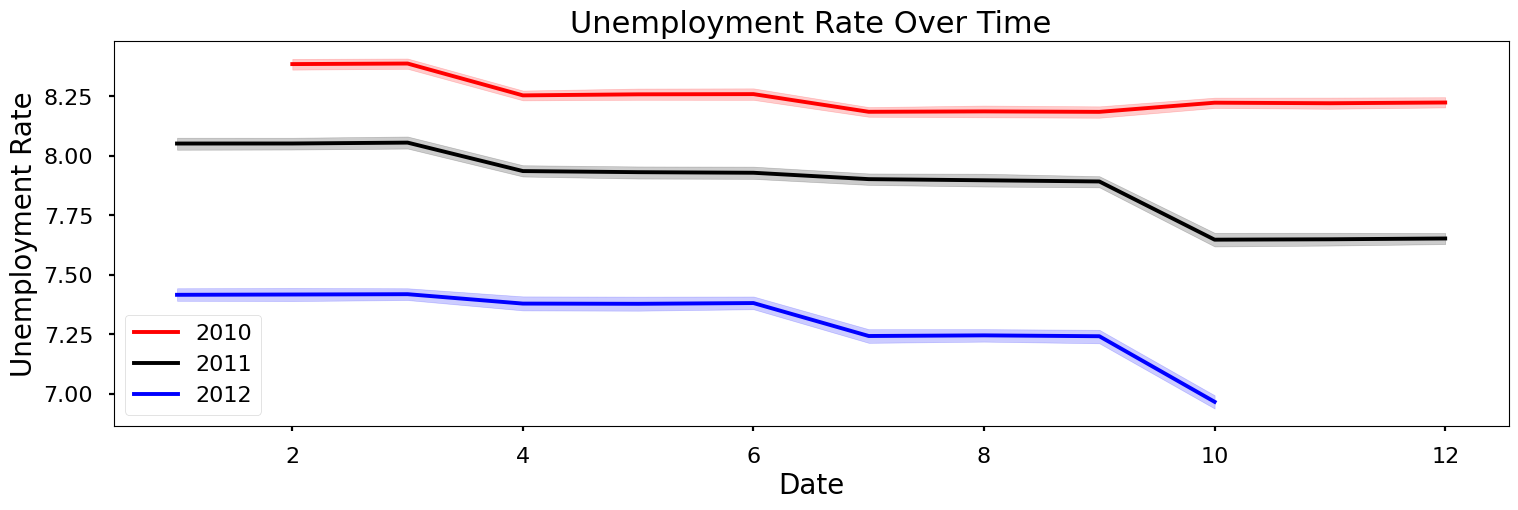

In [101]:
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = df[df['year'] == int(year)],
                 x = 'month',
                 y = 'unemployment',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Unemployment Rate Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Unemployment Rate', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

The unemployment rate decreases over time.

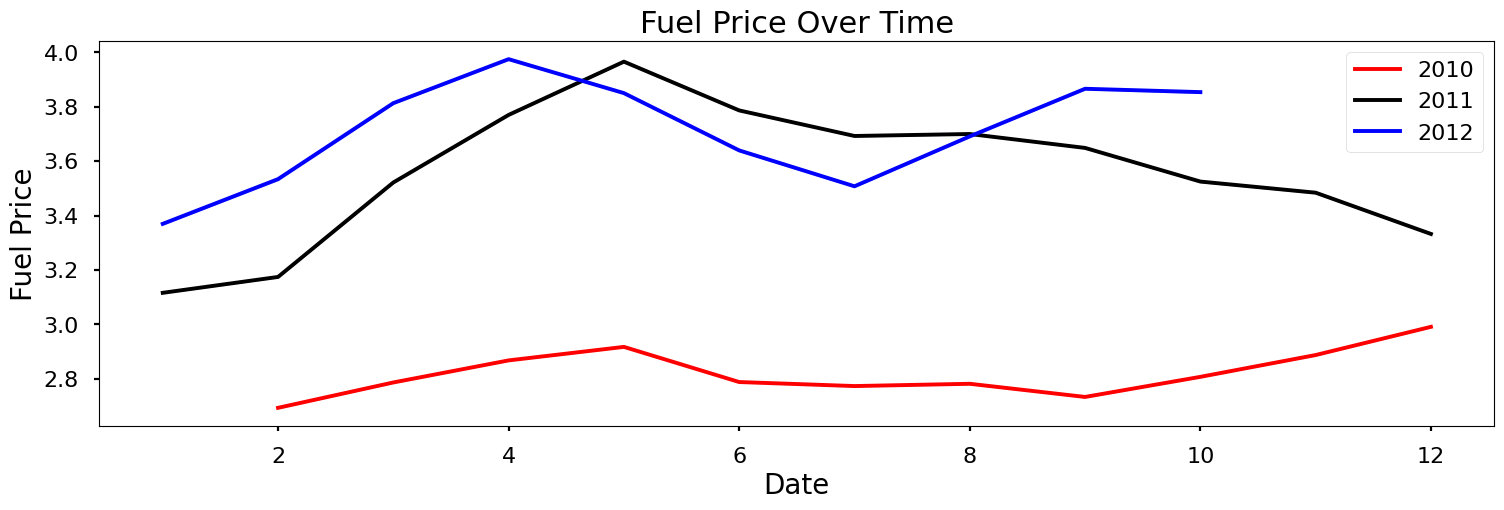

In [102]:
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = df[df['year'] == int(year)],
                 x = 'month',
                 y = 'fuel_price',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Fuel Price Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Fuel Price', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

The fuel price increases over time.